# Airline Passenger Satisfaction Prediction
---
#### **Author**: Michael Holthouser

![Header](images/title_pic.jpeg)

## Business Understanding
---
- **Explorer Airlines** has tasked me to provide prediction analysis on their passenger's satisfaction levels, and to provide insight on what key features have the greatest influence customer satisfaction. The competition is strong in the airline industry. By identifying these important features and working to improve on them, will give Explorer Airlines a competative edge, and as a result improve customer satisfaction.




## Models
1. Logistic Regression 
2. Decision Tree
3. Random Forest
4. <mark>CatBoost</mark> (best model)
5. XGBoost

## Relevant Packages and Libraries 

In [36]:
#Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split,  GridSearchCV
from sklearn.metrics import accuracy_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
import catboost as ctb

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)

## Data Understanding
---
- The data was downloaded from [Kaggle](https://www.kaggle.com/datasets/mysarahmadbhat/airline-passenger-satisfaction). The dataset is comprised of 103,904 airline passenger surveys about their travel experience. The dataset was comprised mostly of categorical data, and the target variable was 'satisfaction'. Satisfaction was divided up into two options making this a binary classification problem. Passengers were classified as either being 'satisfied' or 'neutral/dissatisfied'.

In [37]:
#import the data
data = pd.read_csv("data/train.csv")
data.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


## Column Descriptions:
---
- **Gender**: Gender of the passengers (Female, Male)

- **Customer Type**: The customer type (Loyal customer, disloyal customer)

- **Age**: The actual age of the passengers

- **Type of Travel**: Purpose of the flight of the passengers (Personal Travel, Business Travel)

- **Class**: Travel class in the plane of the passengers (Business, Eco, Eco Plus)

- **Flight distance**: The flight distance of this journey

- **Inflight wifi service**: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)

- **Departure/Arrival time convenient**: Satisfaction level of Departure/Arrival time convenient

- **Ease of Online booking**: Satisfaction level of online booking

- **Gate location**: Satisfaction level of Gate location

- **Food and drink**: Satisfaction level of Food and drink

- **Online boarding**: Satisfaction level of online boarding

- **Seat comfort**: Satisfaction level of Seat comfort

- **Inflight entertainment**: Satisfaction level of inflight entertainment

- **On-board service**: Satisfaction level of On-board service

- **Leg room service**: Satisfaction level of Leg room service

- **Baggage handling**: Satisfaction level of baggage handling

- **Check-in service**: Satisfaction level of Check-in service

- **Inflight service**: Satisfaction level of inflight service

- **Cleanliness**: Satisfaction level of Cleanliness

- **Departure Delay in Minutes**: Minutes delayed when departure

- **Arrival Delay in Minutes**: Minutes delayed when Arrival

- <mark>**Satisfaction**</mark>: Airline satisfaction level (Satisfaction, neutral or dissatisfaction)

# Data Cleaning
---
- Drop unnecessary columns: Unnamed, id
- Format columns to use conventional python coding. Words should be lower-case and use snake case. 
- Remove rows with NaN values.
- Rename elements in 'Customer Type' for easier comprehension.
- Rename certain columns for easier comprehension. 
- The survey rows that contain satisfaction scores of 0 will be removed. 
    - The customer most likely did not indicate the score for that particular category. 
- Columns, Departure Delay in Minutes and Arrival Delay in Minutes will be combined into a column called Total Delay. 
- Our target variable will be changed from an object data type to a numerical data type. 

### Drop Columns: Unnamed, id

- Unnamed and id are not necessary for our analysis. Therefore, I will remove them from the dataset. 

In [38]:
data = data.drop(['Unnamed: 0', 'id'], axis=1)
data.head(1)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied


### Rename Columns

- Next I will rename the columns to follow the conventional python developer format. 
    - lowercase and snake case.  

In [39]:
# Function to convert strings to snake case 
def snake_case(string):
    return string.lower().replace(' ', '_')

#rename columsn to lower case using snake case
for column in data.columns:
    data = data.rename(columns={column: snake_case(column)})

In [40]:
#Call info() method to check columns names, dtypes, and number of records 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   gender                             103904 non-null  object 
 1   customer_type                      103904 non-null  object 
 2   age                                103904 non-null  int64  
 3   type_of_travel                     103904 non-null  object 
 4   class                              103904 non-null  object 
 5   flight_distance                    103904 non-null  int64  
 6   inflight_wifi_service              103904 non-null  int64  
 7   departure/arrival_time_convenient  103904 non-null  int64  
 8   ease_of_online_booking             103904 non-null  int64  
 9   gate_location                      103904 non-null  int64  
 10  food_and_drink                     103904 non-null  int64  
 11  online_boarding                    1039

### Descriptive Statistics

In [41]:
data.describe()

,age,flight_distance,inflight_wifi_service,departure/arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,on-board_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


### Check For Missing Values

In [42]:
data.isna().sum()

gender                                 0
customer_type                          0
age                                    0
type_of_travel                         0
class                                  0
flight_distance                        0
inflight_wifi_service                  0
departure/arrival_time_convenient      0
ease_of_online_booking                 0
gate_location                          0
food_and_drink                         0
online_boarding                        0
seat_comfort                           0
inflight_entertainment                 0
on-board_service                       0
leg_room_service                       0
baggage_handling                       0
checkin_service                        0
inflight_service                       0
cleanliness                            0
departure_delay_in_minutes             0
arrival_delay_in_minutes             310
satisfaction                           0
dtype: int64

- It appears that we have **310** NaN values from the arrival_delay_in_minutes column. 
- 310 is not enough missing values to effect my analysis of the data. 
- The next step I will delete the 310 records with missing data. 

In [43]:
missing_arrival_delay = data[data['arrival_delay_in_minutes'].isna()]
missing_arrival_delay.head()

,gender,customer_type,age,type_of_travel,class,flight_distance,inflight_wifi_service,departure/arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,on-board_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
213,Female,Loyal Customer,38,Business travel,Eco,109,5,3,3,3,5,5,5,5,5,2,4,1,1,5,31,NaN,satisfied
1124,Male,Loyal Customer,53,Personal Travel,Eco,1012,3,2,3,4,4,3,4,4,4,4,4,3,3,4,38,NaN,neutral or dissatisfied
1529,Male,Loyal Customer,39,Business travel,Business,733,2,5,5,5,2,4,3,2,2,2,2,2,2,3,11,NaN,neutral or dissatisfied
2004,Female,disloyal Customer,26,Business travel,Business,1035,3,3,3,1,2,3,2,2,3,3,4,5,5,2,41,NaN,neutral or dissatisfied
2108,Female,Loyal Customer,24,Personal Travel,Eco,417,2,1,2,2,5,2,5,5,1,4,2,1,2,5,1,NaN,neutral or dissatisfied


#### Drop Records With Missing Data

In [44]:
data.dropna(axis=0, inplace=True)

In [45]:
# Check to see if missing data records have been removed. 
data.isna().sum()

gender                               0
customer_type                        0
age                                  0
type_of_travel                       0
class                                0
flight_distance                      0
inflight_wifi_service                0
departure/arrival_time_convenient    0
ease_of_online_booking               0
gate_location                        0
food_and_drink                       0
online_boarding                      0
seat_comfort                         0
inflight_entertainment               0
on-board_service                     0
leg_room_service                     0
baggage_handling                     0
checkin_service                      0
inflight_service                     0
cleanliness                          0
departure_delay_in_minutes           0
arrival_delay_in_minutes             0
satisfaction                         0
dtype: int64

#### Rename 'customer_type' Elements

In [46]:
data['customer_type'] = data['customer_type'].map({'Loyal Customer':'Returning Customer', 
                                                   'disloyal Customer':'First-time Customer'})

#### Rename column names

In [47]:
data = data.rename(columns={'leg_room_service':'leg_room', 
                            'departure/arrival_time_convenient':'departure/arrival_time_convenience'})

In [48]:
# Check to see if changes have been made to the dataframe
data

,gender,customer_type,age,type_of_travel,class,flight_distance,inflight_wifi_service,departure/arrival_time_convenience,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,on-board_service,leg_room,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
0,Male,Returning Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,First-time Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Returning Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Returning Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Returning Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,Female,First-time Customer,23,Business travel,Eco,192,2,1,2,3,2,2,2,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,Male,Returning Customer,49,Business travel,Business,2347,4,4,4,4,2,4,5,5,5,5,5,5,5,4,0,0.0,satisfied
103901,Male,First-time Customer,30,Business travel,Business,1995,1,1,1,3,4,1,5,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,Female,First-time Customer,22,Business travel,Eco,1000,1,1,1,5,1,1,1,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


#### Remove rows where the customers did not indicate a satisfaction score
- Scores for these columns should be between 1-5, not 0. 

In [49]:
data = data[(data['inflight_wifi_service']!=0) & (data['departure/arrival_time_convenience']!=0) & 
           (data['ease_of_online_booking']!=0) & (data['gate_location']!=0) & (data['food_and_drink']!=0) &
           (data['online_boarding']!=0) & (data['seat_comfort']!=0) & (data['inflight_entertainment']!=0) &
           (data['on-board_service']!=0) & (data['leg_room']!=0) & (data['checkin_service']!=0) & 
           (data['inflight_service']!=0) & (data['cleanliness']!=0)]

#### Map target variable, satisfaction column, to contain 0 and 1
- Currently the satisfaction column is made up of two elements of the object data type.  I am going to map them to 0 and 1 for modeling purposes. 
- **neutral or dissatisfied = 0**
- **satisfied = 1**

In [50]:
data['satisfaction'] = data['satisfaction'].map({'neutral or dissatisfied' : 0, 'satisfied' : 1})

#### Combine columns (departure_delay_in_minutes and arrival_delay_in_minutes) to make total_delay_in_minutes
- The column departure_delay_in_minutes is set as an int data type where as the arrival_delay_in_minutes is in float data type. 
- Before combining the two columns together, I will first change the data type of departure_delay_in_minutes to a float data type. 

In [51]:
data['departure_delay_in_minutes'] = data['departure_delay_in_minutes'].astype('float')

In [52]:
data['total_delay_in_minutes'] = data['departure_delay_in_minutes'] + data['arrival_delay_in_minutes']

#### Drop columns 'departure_delay_in_minutes' and 'arrival_delay_in_minutes'
- Since I created a new column combining the two columns, leaving them in my dataframe is not necessary. 

In [53]:
data = data.drop(['departure_delay_in_minutes', 'arrival_delay_in_minutes'], axis=1)

In [54]:
# Check dataframe for changes 
data

,gender,customer_type,age,type_of_travel,class,flight_distance,inflight_wifi_service,departure/arrival_time_convenience,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,on-board_service,leg_room,baggage_handling,checkin_service,inflight_service,cleanliness,satisfaction,total_delay_in_minutes
0,Male,Returning Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,0,43.0
1,Male,First-time Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,0,7.0
2,Female,Returning Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,1,0.0
3,Female,Returning Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,0,20.0
4,Male,Returning Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,Female,First-time Customer,23,Business travel,Eco,192,2,1,2,3,2,2,2,2,3,1,4,2,3,2,0,3.0
103900,Male,Returning Customer,49,Business travel,Business,2347,4,4,4,4,2,4,5,5,5,5,5,5,5,4,1,0.0
103901,Male,First-time Customer,30,Business travel,Business,1995,1,1,1,3,4,1,5,4,3,2,4,5,5,4,0,21.0
103902,Female,First-time Customer,22,Business travel,Eco,1000,1,1,1,5,1,1,1,1,4,5,1,5,4,1,0,0.0


## EDA: Exploratory Data Analysis

- I will first explore the categorical columns, to check their distributions.
- Then I will label encode them to convert them to a numerical data type for modeling. 

### Show The Unique Values of Each Column

In [55]:
for col in data.columns:
    print(f'Column: {col}')
    
    print(data[col].unique())

Column: gender
['Male' 'Female']
Column: customer_type
['Returning Customer' 'First-time Customer']
Column: age
[13 25 26 61 47 52 41 20 24 12 53 33 45 38  9 17 43 58 57 49 36 22 31 15
 35 67 37 40 34 39 50 29 54 21 28 27 69 60 23 48 59 46 30 66 64 44 51 32
 19 42 16 11 62  8 56 68 18 55 65 72 70 63 10  7 14 80 74 71 85 73 76 77
 75 79 78]
Column: type_of_travel
['Personal Travel' 'Business travel']
Column: class
['Eco Plus' 'Business' 'Eco']
Column: flight_distance
[ 460  235 1142 ...  974 1479  400]
Column: inflight_wifi_service
[3 2 4 1 5]
Column: departure/arrival_time_convenience
[4 2 5 3 1]
Column: ease_of_online_booking
[3 2 5 4 1]
Column: gate_location
[1 3 2 5 4]
Column: food_and_drink
[5 1 2 4 3]
Column: online_boarding
[3 5 2 1 4]
Column: seat_comfort
[5 1 2 3 4]
Column: inflight_entertainment
[5 1 2 3 4]
Column: on-board_service
[4 1 2 3 5]
Column: leg_room
[3 5 4 2 1]
Column: baggage_handling
[4 3 5 1 2]
Column: checkin_service
[4 1 3 5 2]
Column: inflight_service
[5 4 3 1

### Satisfaction

- The image below shows the distribution of surveys completed with being labeled as satisfied or dissatisfied. 
- It appears more people were willing to complete the survey because they were dissatisfied with their travel experience. 
- [count/percentages ref](https://stackoverflow.com/questions/31749448/how-to-add-percentages-on-top-of-grouped-bars)

In [56]:
print("Satisfaction Counts")
print(data['satisfaction'].value_counts())
print()
print("Percentages")
print(data["satisfaction"].value_counts(normalize=True))

Satisfaction Counts
0    54777
1    40638
Name: satisfaction, dtype: int64

Percentages
0    0.574092
1    0.425908
Name: satisfaction, dtype: float64


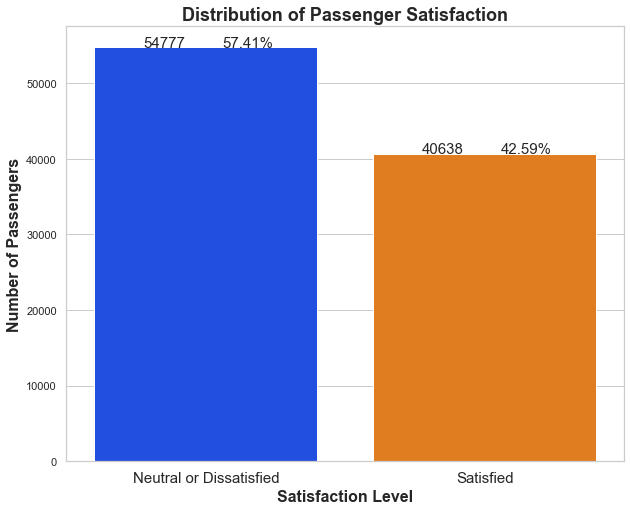

In [57]:
sns.set_style('whitegrid')
plt.figure(figsize=(10, 8))
ax = sns.countplot(x='satisfaction', data=data, palette='bright')
plt.title('Distribution of Passenger Satisfaction', fontweight='bold', fontsize='18')
plt.xlabel('Satisfaction Level', fontweight='bold', fontsize='16')
plt.ylabel('Number of Passengers', fontweight='bold', fontsize='16')
ax.set_xticklabels(['Neutral or Dissatisfied', 'Satisfied'], fontsize='15')

# Add count and percentage labels next to each bar
total = float(len(data['satisfaction']))
for i, count in enumerate(data['satisfaction'].value_counts()):
    percentage = '{:.2f}%'.format((count/total) * 100)
    ax.text(i-0.15, count+50, str(count), ha='center', fontsize='15')
    ax.text(i+0.15, count+50, percentage, ha='center', fontsize='15')
    
plt.savefig('images/satisfaction.png', format='png')

plt.show()





- **Check for imbalance**: With the the data being split 57:43 between dissatisfied and satisfied, there is no need for any special resampling techniques to balance the data. 

### Type of Travel
- **Type of Travel**: Purpose of the flight of the passengers (Personal Travel, Business Travel)
- For business passengers have different needs and expectations than passengers traveling for pleasure. They pay more money for their tickets in return for a more comfortable flight experience. 
- Personal travel usually means that the price of travel comes out of the pocket of the person traveling. However, due to the more affordable price of traveling for these particular passengers, the flight experience will not be nearly as comfortable as those traveling for business.   

In [58]:
type_group = data.groupby(['satisfaction', 'type_of_travel'])['type_of_travel'].count()
type_group

satisfaction  type_of_travel 
0             Business travel    27765
              Personal Travel    27012
1             Business travel    38161
              Personal Travel     2477
Name: type_of_travel, dtype: int64

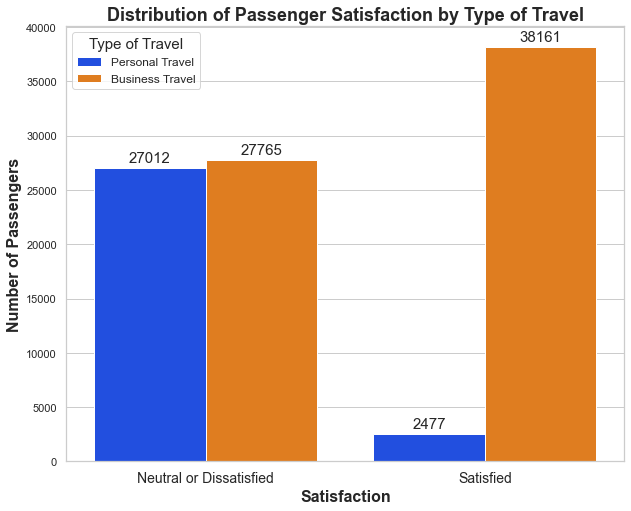

In [59]:
sns.set_style('whitegrid')

plt.figure(figsize=(10, 8))

ax = sns.countplot(x='satisfaction', hue='type_of_travel', data=data, palette='bright')

plt.title('Distribution of Passenger Satisfaction by Type of Travel', fontweight='bold', fontsize='18')
plt.xlabel('Satisfaction', fontweight='bold', fontsize='16')
plt.ylabel('Number of Passengers', fontweight='bold', fontsize='16')
ax.set_xticklabels(['Neutral or Dissatisfied', 'Satisfied'], fontsize=14)

# Add count values to the top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points', fontsize='15')

# Increase the size of the legend and its labels
plt.legend(fontsize='14', title_fontsize='16')

# Change the labels of the legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['Personal Travel', 'Business Travel'], fontsize='12', title='Type of Travel', title_fontsize='15')

plt.savefig('images/type_of_travel.png', format='png')

plt.show();


#### Observations: 
- Looking at this graph in the perspective of airline executives, I would be happy to see the number of satisfied business travelers. 
- However, I would be taken back by the number of business travelers who were rated as neutral/dissatisfied. That number should be addressed by the company immediately. 

### Class
- It is clear that amongst the completed surveys of satisfied passengers, the majority come from the business class. 
- The clear majority of neutral or dissatisfied passengers were flying in the eco class. 

In [60]:
class_group = data.groupby(['satisfaction', 'class'])['class'].count()
class_group

satisfaction  class   
0             Business    14599
              Eco         34831
              Eco Plus     5347
1             Business    31736
              Eco          7272
              Eco Plus     1630
Name: class, dtype: int64

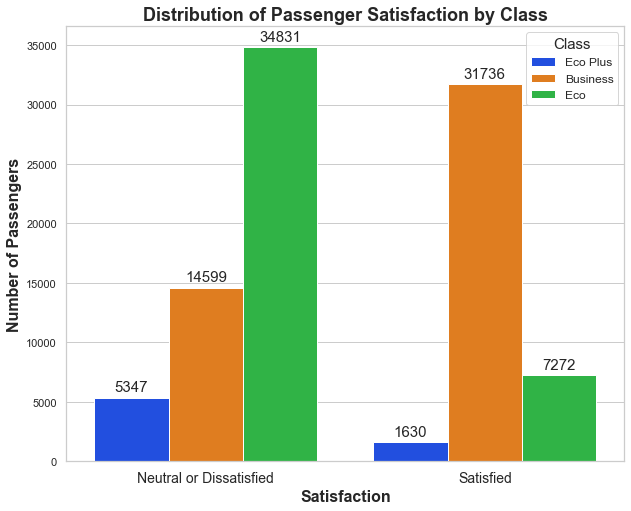

In [61]:
sns.set_style('whitegrid')

plt.figure(figsize=(10, 8))

ax = sns.countplot(x='satisfaction', hue='class', data=data, palette='bright')

plt.title('Distribution of Passenger Satisfaction by Class', fontweight='bold', fontsize='18')
plt.xlabel('Satisfaction', fontweight='bold', fontsize='16')
plt.ylabel('Number of Passengers', fontweight='bold', fontsize='16')
ax.set_xticklabels(['Neutral or Dissatisfied', 'Satisfied'], fontsize=14)

# Add count values to the top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points', fontsize='15')

# Increase the size of the legend and its labels
plt.legend(fontsize='14', title_fontsize='16')

# Change the labels of the legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['Eco Plus', 'Business', 'Eco'], fontsize='12', title='Class', title_fontsize='15')

plt.savefig('images/class.png', format='png')

plt.show();

### Inflight Wifi Service
- Wifi service has become an important part of daily life as society uses it for business or pleasure.
- For passengers traveling for business, wifi is very important. It should always be accessible for these passengers. 
- In my final model's feature importance at the end of the notebook, it is clear that wifi is most important feature if airlines want to the passengers to have a satisfied experience. 

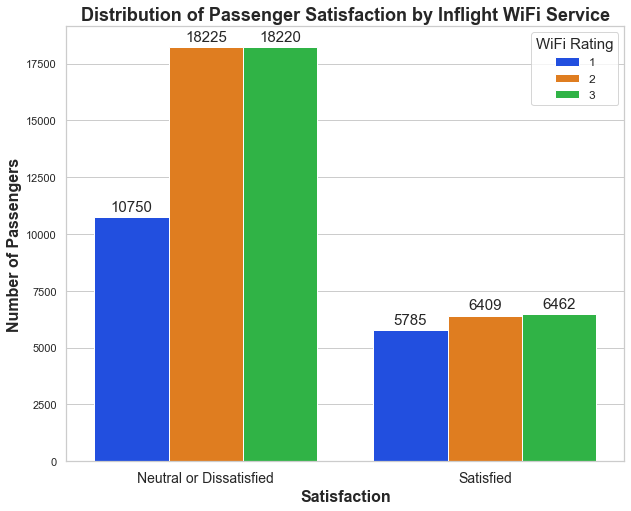

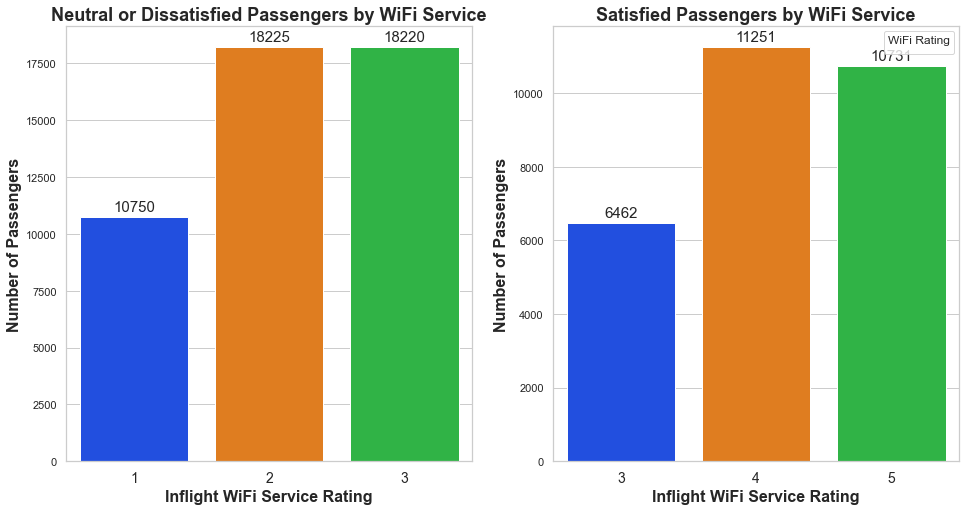

In [184]:
# Create countplot
sns.set_style('whitegrid')

plt.figure(figsize=(10, 8))

ax = sns.countplot(x='satisfaction', hue='inflight_wifi_service', data=data, palette='bright', hue_order=[1, 2, 3])

plt.title('Distribution of Passenger Satisfaction by Inflight WiFi Service', fontweight='bold', fontsize='18')
plt.xlabel('Satisfaction', fontweight='bold', fontsize='16')
plt.ylabel('Number of Passengers', fontweight='bold', fontsize='16')
ax.set_xticklabels(['Neutral or Dissatisfied', 'Satisfied'], fontsize=14)

# Add count values to the top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points', fontsize='15')

# Change the labels of the legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['1', '2', '3'], fontsize='12', title='WiFi Rating', title_fontsize='15')

# Create two separate data frames for not satisfied and satisfied groups
not_satisfied = data.loc[data['satisfaction'] == 0]
satisfied = data.loc[data['satisfaction'] == 1]

# Create countplots for each group separately
fig, axes = plt.subplots(1, 2, figsize=(16, 8))


sns.set_style('whitegrid')

# Plot countplot for not satisfied group
sns.countplot(x='inflight_wifi_service', data=not_satisfied, palette='bright', hue_order=[1, 2, 3, 4, 5], order=[1, 2, 3], ax=axes[0])
axes[0].set_title('Neutral or Dissatisfied Passengers by WiFi Service', fontweight='bold', fontsize='18')
axes[0].set_xlabel('Inflight WiFi Service Rating', fontweight='bold', fontsize='16')
axes[0].set_ylabel('Number of Passengers', fontweight='bold', fontsize='16')
axes[0].set_xticklabels(['1', '2', '3'], fontsize=14)

# Add count values to the top of each bar
for p in axes[0].patches:
    axes[0].annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points', fontsize='15')

# Plot countplot for satisfied group
sns.countplot(x='inflight_wifi_service', data=satisfied, palette='bright', hue_order=[1, 2, 3, 4, 5], order=[3, 4, 5], ax=axes[1])
axes[1].set_title('Satisfied Passengers by WiFi Service', fontweight='bold', fontsize='18')
axes[1].set_xlabel('Inflight WiFi Service Rating', fontweight='bold', fontsize='16')
axes[1].set_ylabel('Number of Passengers', fontweight='bold', fontsize='16')
axes[1].set_xticklabels(['3', '4', '5'], fontsize=14)

# Add count values to the top of each bar
for p in axes[1].patches:
    axes[1].annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points', fontsize='15')

# Change the labels of the legend
handles, labels = axes[1].get_legend_handles_labels()
axes[1].legend(handles, ['1', '2', '3', '4', '5'], fontsize='10', title='WiFi Rating', title_fontsize='12')

#plt.savefig('images/wifi.png', format='png')



plt.show()



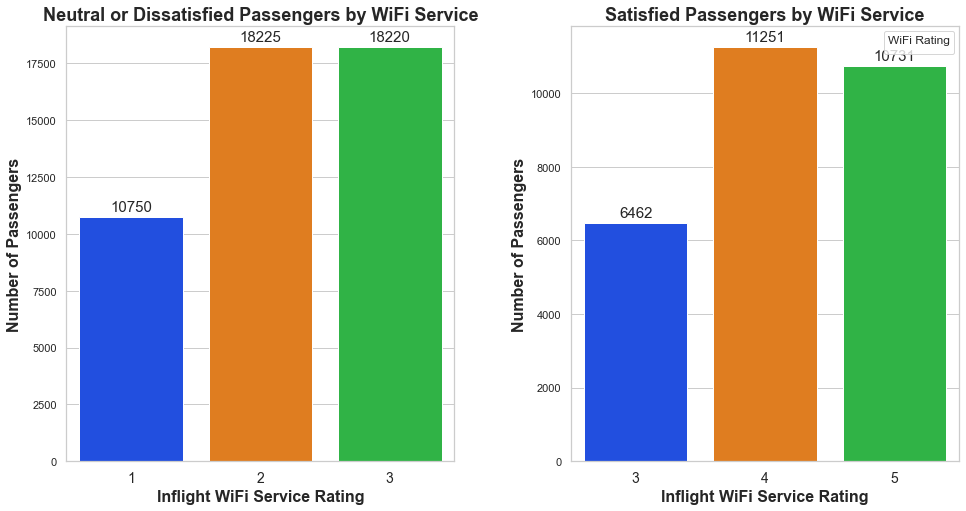

In [190]:
# Create two separate data frames for not satisfied and satisfied groups
not_satisfied = data.loc[data['satisfaction'] == 0]
satisfied = data.loc[data['satisfaction'] == 1]

# Create countplots for each group separately
fig, axes = plt.subplots(1, 2, figsize=(16, 8))
plt.subplots_adjust(wspace=0.3)

sns.set_style('whitegrid')

# Plot countplot for not satisfied group
sns.countplot(x='inflight_wifi_service', data=not_satisfied, palette='bright', hue_order=[1, 2, 3], order=[1, 2, 3], ax=axes[0])
axes[0].set_title('Neutral or Dissatisfied Passengers by WiFi Service', fontweight='bold', fontsize='18')
axes[0].set_xlabel('Inflight WiFi Service Rating', fontweight='bold', fontsize='16')
axes[0].set_ylabel('Number of Passengers', fontweight='bold', fontsize='16')
axes[0].set_xticklabels(['1', '2', '3'], fontsize=14)

# Add count values to the top of each bar
for p in axes[0].patches:
    axes[0].annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points', fontsize='15')

# Plot countplot for satisfied group
sns.countplot(x='inflight_wifi_service', data=satisfied, palette='bright', hue_order=[3, 4, 5], order=[3, 4, 5], ax=axes[1])
axes[1].set_title('Satisfied Passengers by WiFi Service', fontweight='bold', fontsize='18')
axes[1].set_xlabel('Inflight WiFi Service Rating', fontweight='bold', fontsize='16')
axes[1].set_ylabel('Number of Passengers', fontweight='bold', fontsize='16')
axes[1].set_xticklabels(['3', '4', '5'], fontsize=14)

# Add count values to the top of each bar
for p in axes[1].patches:
    axes[1].annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points', fontsize='15')

# Change the labels of the legend
handles, labels = axes[1].get_legend_handles_labels()
labels = ['1','2','3', '4', '5']
axes[1].legend(handles, labels, fontsize='10', title='WiFi Rating', title_fontsize='12')


#plt.savefig('images/wifi.png', format='png')

plt.show()


In [62]:
wifi_group = data.groupby(['satisfaction', 'inflight_wifi_service'])['inflight_wifi_service'].count()
wifi_group

satisfaction  inflight_wifi_service
0             1                        10750
              2                        18225
              3                        18220
              4                         7476
              5                          106
1             1                         5785
              2                         6409
              3                         6462
              4                        11251
              5                        10731
Name: inflight_wifi_service, dtype: int64

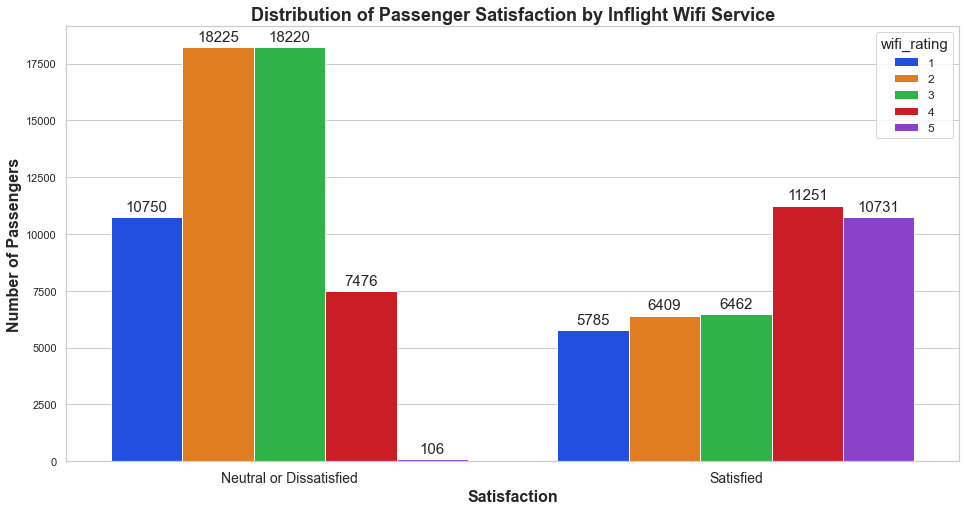

In [144]:
sns.set_style('whitegrid')

plt.figure(figsize=(16, 8))

ax = sns.countplot(x='satisfaction', hue='inflight_wifi_service', data=data, palette='bright')

plt.title('Distribution of Passenger Satisfaction by Inflight Wifi Service', fontweight='bold', fontsize='18')
plt.xlabel('Satisfaction', fontweight='bold', fontsize='16')
plt.ylabel('Number of Passengers', fontweight='bold', fontsize='16')
ax.set_xticklabels(['Neutral or Dissatisfied', 'Satisfied'], fontsize=14)

# Add count values to the top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points', fontsize='15')


# Change the labels of the legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['1', '2', '3', '4', '5'], fontsize='12', title='wifi_rating', title_fontsize='15')

plt.savefig('images/wifi.png', format='png')

plt.show();

#### Observations: 
- From the observations above, it is apparent that if there is excellent wifi aboard flights, passengers will more than likely have a satisfied experience during flights. 

### Customer Type

In [153]:
cust_type_group = data.groupby(['satisfaction', 'customer_type'])['customer_type'].count()
cust_type_group

satisfaction  customer_type      
0             First-time Customer    12584
              Returning Customer     42193
1             First-time Customer     2758
              Returning Customer     37880
Name: customer_type, dtype: int64

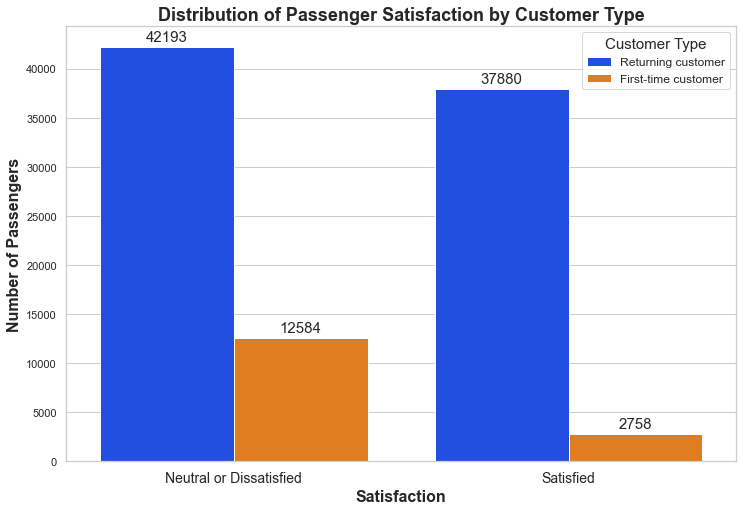

In [164]:
sns.set_style('whitegrid')

plt.figure(figsize=(12, 8))

ax = sns.countplot(x='satisfaction', hue='customer_type', data=data, palette='bright')

plt.title('Distribution of Passenger Satisfaction by Customer Type', fontweight='bold', fontsize='18')
plt.xlabel('Satisfaction', fontweight='bold', fontsize='16')
plt.ylabel('Number of Passengers', fontweight='bold', fontsize='16')
ax.set_xticklabels(['Neutral or Dissatisfied', 'Satisfied'], fontsize=14)

# Add count values to the top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points', fontsize='15')


# Change the labels of the legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['Returning customer', 'First-time customer'], fontsize='12', title='Customer Type', title_fontsize='15')

plt.savefig('images/customer_type.png', format='png')

plt.show();

#### Observations:
- There were significantly more returning customers in this dataset compared to first-time customers.
- From this data alone, it seems like first-time customers are more likely to be satified than returning customers. 

## Feature Selection
- Feature selection is an important process for several reasons:
    - Improves model performance. 
        - You want to remove irrelevant features. 
    - Reduces overfitting. 
        - Too many features can lead to overfitting.
    - Reducing computational time and storage requirements. 
    - Improving interpretability. 
        - Using fewer features can make the model easier to understand. 

### One-Hot Encoding
- First step is to one-hot encode the categorical variables in my dataset. 
- The new variable called data_clean is the new dataframe with the one-hot encoded variables. Once the the new dummy variables were created, the original variables were dropped from the dataset. 

In [66]:
# Combine Eco and Eco plus
data['class'] = data['class'].map({'Eco':'Economy','Eco Plus':'Economy','Business':'Business'})

- Since Eco plus makes up such a small portion of the data, and in essence is still technically economy class, I will combine the two elements to make it easier to read and model.

In [67]:
data_clean = pd.get_dummies(data, columns=['gender', 'customer_type', 'type_of_travel', 'class'])

#data_clean = pd.concat([data, one_hot], axis=1)
data_clean.head()
#data_clean.head(0)

,age,flight_distance,inflight_wifi_service,departure/arrival_time_convenience,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,on-board_service,leg_room,baggage_handling,checkin_service,inflight_service,cleanliness,satisfaction,total_delay_in_minutes,gender_Female,gender_Male,customer_type_First-time Customer,customer_type_Returning Customer,type_of_travel_Business travel,type_of_travel_Personal Travel,class_Business,class_Economy
0,13,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,0,43.0,0,1,0,1,0,1,0,1
1,25,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,0,7.0,0,1,1,0,1,0,1,0
2,26,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,1,0.0,1,0,0,1,1,0,1,0
3,25,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,0,20.0,1,0,0,1,1,0,1,0
4,61,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,1,0.0,0,1,0,1,1,0,1,0


In [68]:
# remove satisfaction column and save it to a new variable
satisfaction = data_clean.pop('satisfaction')

# insert satisfaction column at new position
data_clean.insert(0, 'satisfaction', satisfaction)


#### Correlation Matrix and Heatmap
- This is the next step of feature selection.
- When reading a heat map and correlation matrix, you want to look at each coordinate and select the largest numbers. 
    - The closer the number is to 1, the higher the correlation, making it a strong feature to select for you modeling. 
- The heat map is a more visually appeasing version of a correlation matrix. The lighter the color is, the weaker the relationship is. 
- In this case I visually detect 5 variables that have weak relationships with our target variable, 'satisfaction'.
    - **age**
    - **departure/arrival_time_convenience**
    - **gate_location**
    - **total_delay_in_minutes**
    - **gender_Male**

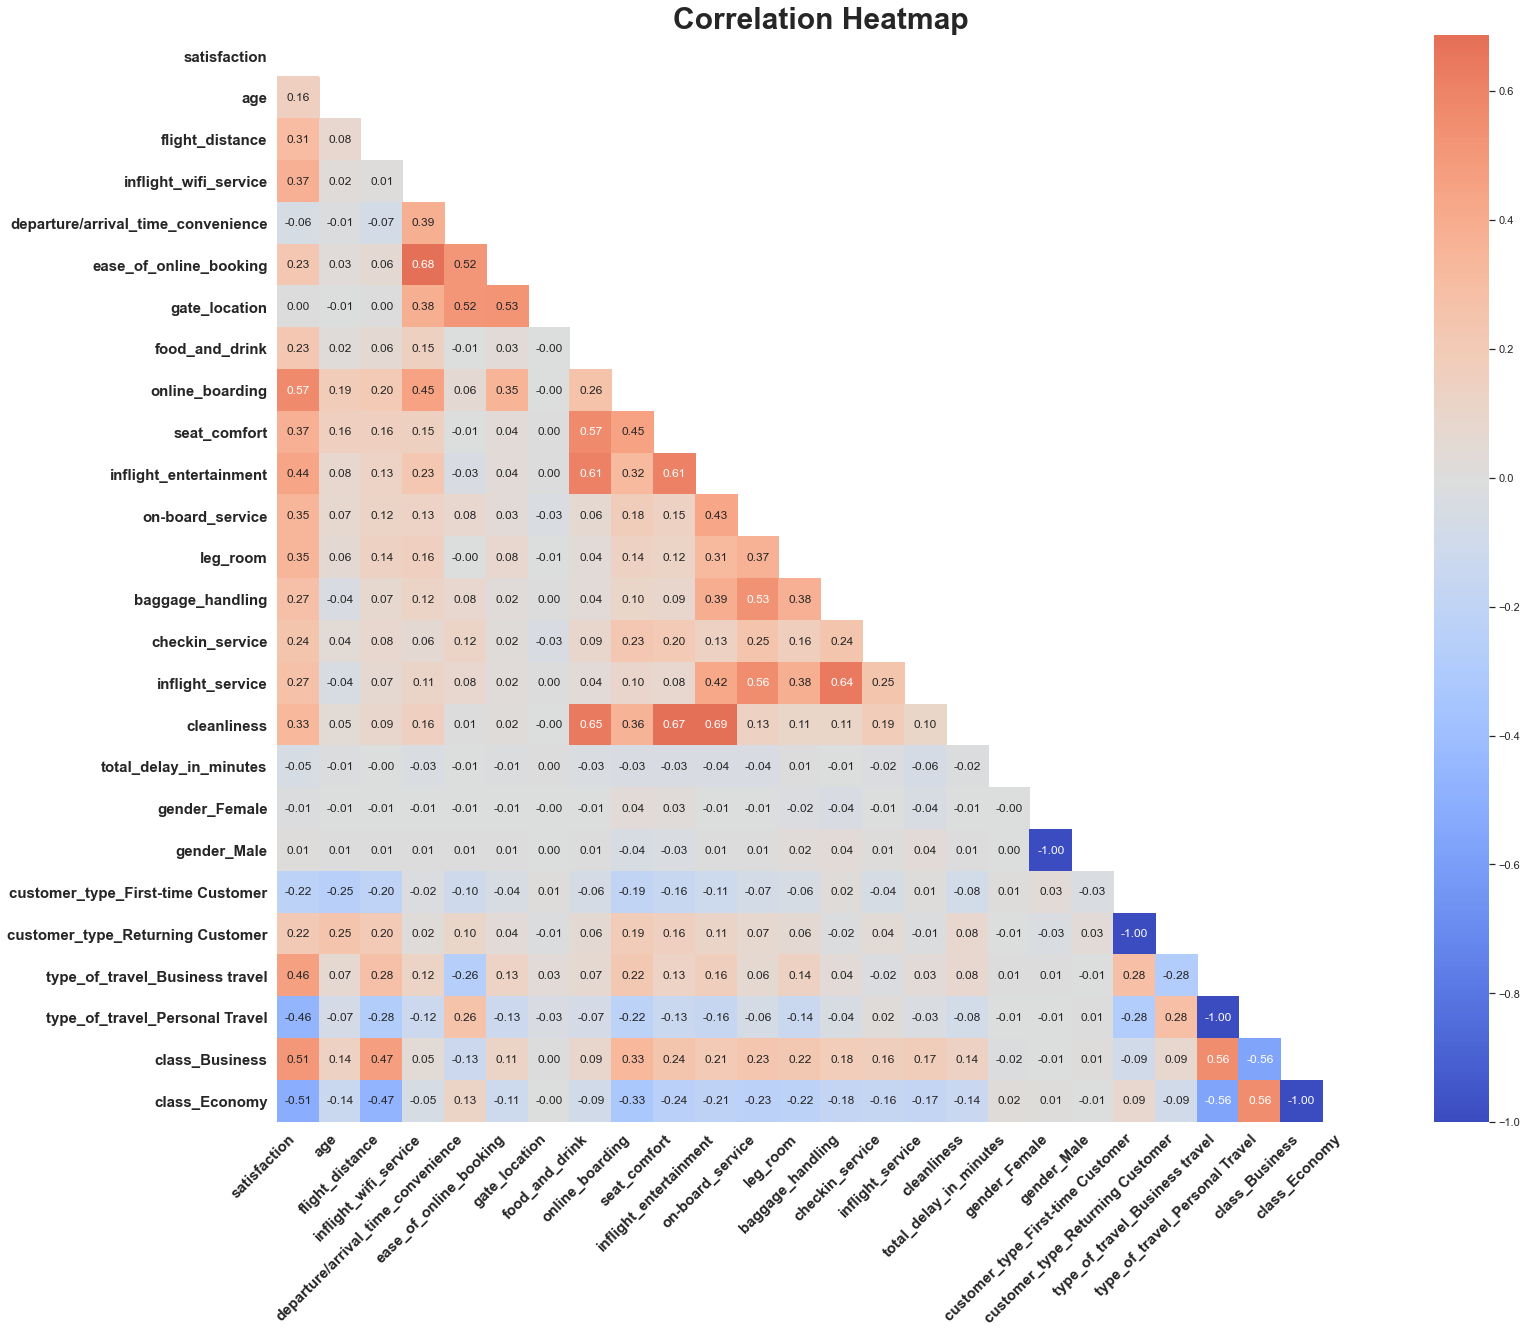

In [69]:
# Create heat map
corr_matrix = data_clean.corr()
fig, ax = plt.subplots(figsize=(25,20))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f', cmap='coolwarm', center=0, square=True, ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize='15', fontweight='bold')
ax.set_yticklabels(ax.get_yticklabels(), fontsize='15', fontweight='bold')
plt.title('Correlation Heatmap', fontweight='bold', fontsize = '30')

plt.show()

In [70]:
# correlation matrix as satisfaction as the target
satisfaction_corr = data_clean.corr()['satisfaction'].map(abs).sort_values(ascending=False)
satisfaction_corr

satisfaction                          1.000000
online_boarding                       0.569430
class_Business                        0.508958
class_Economy                         0.508958
type_of_travel_Business travel        0.462451
type_of_travel_Personal Travel        0.462451
inflight_entertainment                0.438129
seat_comfort                          0.374924
inflight_wifi_service                 0.374004
on-board_service                      0.349038
leg_room                              0.345042
cleanliness                           0.327679
flight_distance                       0.307627
baggage_handling                      0.272755
inflight_service                      0.268044
checkin_service                       0.242945
ease_of_online_booking                0.230243
food_and_drink                        0.226694
customer_type_First-time Customer     0.217887
customer_type_Returning Customer      0.217887
age                                   0.155291
departure/arr

- Just to confirm with the heatmap, this list of variables confirms that in fact age, departure/arrival_time_convenience, total_delay_in_minutes, gender_Male, and gate_location have the weakest relationships to our target variable satisfaction. 
- The next step will be to remove these variables from the dataset before we begin modeling.  

#### Drop weak correlated variables

In [71]:
data_clean.drop(['age', 'departure/arrival_time_convenience', 'total_delay_in_minutes', 
                              'gender_Male', 'gate_location'], axis=1, inplace=True)

In [72]:
# Check if columns have been removed from the final dataframe
data_clean.head(1)

,satisfaction,flight_distance,inflight_wifi_service,ease_of_online_booking,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,on-board_service,leg_room,baggage_handling,checkin_service,inflight_service,cleanliness,gender_Female,customer_type_First-time Customer,customer_type_Returning Customer,type_of_travel_Business travel,type_of_travel_Personal Travel,class_Business,class_Economy
0,0,460,3,3,5,3,5,5,4,3,4,4,5,5,0,0,1,0,1,0,1


## Prepare Data for Modeling
- Create X and Y variables.
    - X = independent variables.
    - y = dependent variable.
- Split the data in 80/20 train/test. 

#### Create X and y variables

In [73]:
# Create X
X = data_clean.drop('satisfaction', axis=1)

# Create y
y = data_clean['satisfaction']

#### Perform train/test split 

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

#### Scale The Data For Modeling Purposes

In [75]:
# Initialize standard scaler
scaler = StandardScaler()

# Fit the scaler to the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the fitted scaler
X_test_scaled = scaler.transform(X_test)

### Baseline Model : Logistic Regression
- Initiate the logistic regression model.
- Fit the model on our training data.

In [76]:
# Initialize Logistic Regression
logreg = LogisticRegression(solver='liblinear', random_state=42)

# Fit the model
logreg.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42, solver='liblinear')

#### Get Predicitions
- Get our predictions on our training and test data. 

In [77]:
y_pred_train = logreg.predict(X_train_scaled)
y_pred = logreg.predict(X_test_scaled)

#### Classification Report of the Training Data

In [78]:
conf_mat = confusion_matrix(y_train, y_pred_train)
class_rep = classification_report(y_train, y_pred_train, target_names=['neutral or dissatisfied', 'satisfied'])

print('Confusion Matrix:')
print(conf_mat)

print('\nClassification Report:')
print(class_rep)

Confusion Matrix:
[[37442  3545]
 [ 3930 26644]]

Classification Report:
                         precision    recall  f1-score   support

neutral or dissatisfied       0.91      0.91      0.91     40987
              satisfied       0.88      0.87      0.88     30574

               accuracy                           0.90     71561
              macro avg       0.89      0.89      0.89     71561
           weighted avg       0.90      0.90      0.90     71561



#### Results on Training Data
- **Precision Score**: The precision for the "neutral or dissatisfied" class is 0.90, which means that 90% of the predictions for this class were correct.
- **Recall Score**: The recall for this class is 0.91, which means that 91% of the actual "neutral or dissatisfied" samples were correctly identified.
- **F1-Score**: The F1-score is the harmonic mean of precision and recall, and it is 0.91 for this class. 
- **Accuracy Score**: Accuracy is the proportion of correctly classified instances. On the training data, this model has an accuracy score of 0.90.

Reference for target_names = https://stackoverflow.com/questions/48493322/classification-report-labels-and-target-names

#### Check for Imbalance

In [79]:
# check for imbalance of the training data
print(y_train.value_counts())
print('\n')
print(y_test.value_counts())

0    40987
1    30574
Name: satisfaction, dtype: int64


0    13790
1    10064
Name: satisfaction, dtype: int64


- In the training set, there are 40,987 instances in the "neutral or dissatisfied" class (labeled as 0) and 30,574 instances in the "satisfied" class (labeled as 1). This indicates that there is some class imbalance in the training data, as there are more instances in the "neutral or dissatisfied" class than in the "satisfied" class.

- In the test set, there are 13,790 instances in the "neutral or dissatisfied" class and 10,064 instances in the "satisfied" class. This also indicates some class imbalance in the test data, with more instances in the "neutral or dissatisfied" class than in the "satisfied" class.

#### Logistic Regression with SMOTE
- In classification problems, balancing your data is absolutely crucial. Data is said to be imbalanced when instances of one class outnumber the other(s) by a large proportion.
- SMOTE is the most popular solution to deal with class imbalance. 
- The training data is only slightly imbalanced, but I still want to see if a SMOTE makes a significant enough difference, in order to make the change. 

In [80]:
# instantiate SMOTE
sm = SMOTE(random_state=42)

# resample training data
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

# check class balance after resampling
print(y_train_res.value_counts())

1    40987
0    40987
Name: satisfaction, dtype: int64


In [81]:
# instantiate logistic regression model
logreg = LogisticRegression(solver='liblinear', random_state=42)

# fit the model to the resampled data
logreg.fit(X_train_res, y_train_res)

LogisticRegression(random_state=42, solver='liblinear')

In [82]:
y_pred_train = logreg.predict(X_train_res)

In [83]:
conf_mat = confusion_matrix(y_train_res, y_pred_train)
class_rep = classification_report(y_train_res, y_pred_train, target_names=['neutral or dissatisfied', 'satisfied'])

print('Confusion Matrix:')
print(conf_mat)

print('\nClassification Report:**Logistic Regression w/SMOTE')
print(class_rep)

Confusion Matrix:
[[36684  4303]
 [ 4155 36832]]

Classification Report:**Logistic Regression w/SMOTE
                         precision    recall  f1-score   support

neutral or dissatisfied       0.90      0.90      0.90     40987
              satisfied       0.90      0.90      0.90     40987

               accuracy                           0.90     81974
              macro avg       0.90      0.90      0.90     81974
           weighted avg       0.90      0.90      0.90     81974



- After using SMOTE on the training data, the performance of the model did not change very much. With this being said, I will not procede using SMOTE in my modeling. 

#### Classification Report of the Test Data

In [84]:
conf_mat = confusion_matrix(y_test, y_pred)
class_rep = classification_report(y_test, y_pred, target_names=['neutral or dissatisfied', 'satisfied'])

print('Confusion Matrix:')
print(conf_mat)

print('\nClassification Report: **Logistic Regression On Test Data**')
print(class_rep)

Confusion Matrix:
[[12540  1250]
 [ 1291  8773]]

Classification Report: **Logistic Regression On Test Data**
                         precision    recall  f1-score   support

neutral or dissatisfied       0.91      0.91      0.91     13790
              satisfied       0.88      0.87      0.87     10064

               accuracy                           0.89     23854
              macro avg       0.89      0.89      0.89     23854
           weighted avg       0.89      0.89      0.89     23854



#### Results On Test Data:
- **Precision Score**: The precision of the model for neutral or dissatisfied customers is 91%, which means that out of all the customers predicted as neutral or dissatisfied, 91% were actually neutral or dissatisfied.
- **Recall Score**: The recall for neutral or dissatisfied customers is also 91%, which means that out of all the actual neutral or dissatisfied customers, 91% were correctly predicted as neutral or dissatisfied.
- **F1-Score**: The F1-score for neutral or dissatisfied customers is 91%.
- **Accuracy**: Overall accuracy of 89%, which means that 89% of the predictions made by the model on the test set were correct.

#### Calculate the AUC (area under the curve) to Check Predictive Performance.
- 89% AUC score isn't terrible, but there is definitely room for improvement with the other models that I will use later. 

In [85]:
# Check the AUC of predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
lg_roc_auc = auc(false_positive_rate, true_positive_rate)
lg_roc_auc

0.8905377952388254

#### Confusion Matrix of Test Data

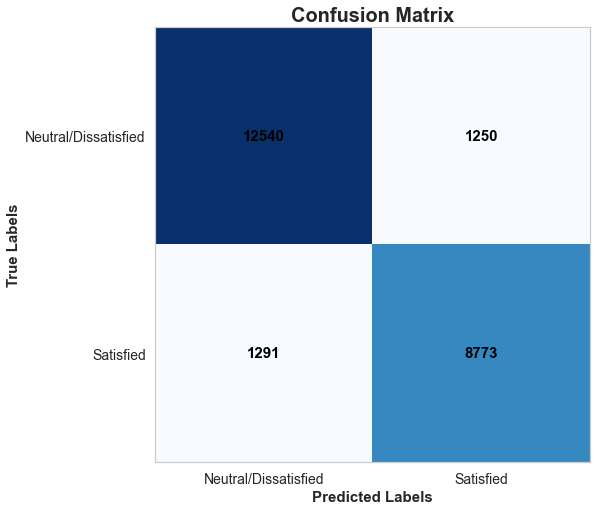

In [86]:
# get confusion matrix
cm_lg = confusion_matrix(y_test, y_pred)

# plot confusion matrix
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm_lg, cmap='Blues')
ax.grid(False)
ax.set_xlabel('Predicted Labels', fontweight='bold', fontsize='15')
ax.set_ylabel('True Labels', fontweight='bold', fontsize='15')
ax.set_title('Confusion Matrix', fontweight='bold', fontsize='20')
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.xaxis.set(ticks=(0, 1), ticklabels=('Neutral/Dissatisfied', 'Satisfied'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Neutral/Dissatisfied', 'Satisfied'))
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)

for i in range(2):
    for j in range(2):
        ax.text(j, i, cm_lg[i, j], ha='center', va='center', color='black', fontsize='15', weight='bold');

#### Confusion Matrix Results:
- The confusion matrix shows that out of 13,790 neutral or dissatisfied customers in the test set, 12,549 were correctly predicted as neutral or dissatisfied (True Negative), while 1,241 were incorrectly predicted as satisfied (False Positive).
- Similarly, out of 10,064 satisfied customers in the test set, 8,771 were correctly predicted as satisfied (True Positive), while 1,293 were incorrectly predicted as neutral or dissatisfied (False Negative).

### Logistic Regression Precision Results:
- Because I am mostly concerned with incorrectly classifying the neutral or dissatisfied passengers as satisfied, I am focusing on the recall score of my models. Retaining customers is very important for the airline industry, especially the passengers that are willing to pay more for business class. 

- This model perfomed slightly better at identifying neutral or dissatisfied customers compared to satisfied customers. 

    - **<mark>Test Data</mark> Precision Score For Satisfied Class**: <mark>88%</mark> 
    - **<mark>Test Data</mark> Precision Score For Neutral/Dissatisfied Class**: <mark>91%</mark> 
    - **<mark>AUC Score</mark>**: <mark>89%</mark>

### Model 2: Decision Tree (No Tuning)
- The first decision tree model will be a "vanilla" one, with no tuning.  
- The second decision tree model will be run with GridSearchCV to find the best hyperparameters.
    - Decision Trees require a lot of pruning to be accurate. GridSearchCV is an excellent means of searching for the best hyperparameters to get the most accurate model. 

#### Initialize Decision Tree Classifier

In [87]:
# Initialize the decision tree classifier
dt_vanilla = DecisionTreeClassifier(random_state=42)

# Fit the decision tree classifier object on the training data
dt_vanilla.fit(X_train_scaled, y_train)

DecisionTreeClassifier(random_state=42)

#### Get Predictions for Training and Test Data

In [88]:
y_pred_dtv = dt_vanilla.predict(X_test_scaled)
y_pred_train_dtv = dt_vanilla.predict(X_train_scaled)

#### Classification Report on Training Data
- With perfect numbers on our training data, it is apparent that there is some overfitting involved on the training data. 
- Like mentioned previously, decision trees require a lot of pruning, which is why we will run the model with GridSearchCV next 

In [89]:
conf_mat_vtrain = confusion_matrix(y_train, y_pred_train_dtv)
class_rep_vtrain = classification_report(y_train, y_pred_train_dtv, target_names=['neutral or dissatisfied', 'satisfied'])

print('Confusion Matrix:')
print(conf_mat_vtrain)

print('\nClassification Report: **Vanilla Decision Tree On Training Data**')
print(class_rep_vtrain)

Confusion Matrix:
[[40987     0]
 [    2 30572]]

Classification Report: **Vanilla Decision Tree On Training Data**
                         precision    recall  f1-score   support

neutral or dissatisfied       1.00      1.00      1.00     40987
              satisfied       1.00      1.00      1.00     30574

               accuracy                           1.00     71561
              macro avg       1.00      1.00      1.00     71561
           weighted avg       1.00      1.00      1.00     71561



#### Classification Report on Test Data
- Scores on our test data aren't bad. However, we do have some overfitting on our data.

In [90]:
conf_mat_vtest = confusion_matrix(y_test, y_pred_dtv)
class_rep_vtest = classification_report(y_test, y_pred_dtv, target_names=['neutral or dissatisfied', 'satisfied'])

print('Confusion Matrix:')
print(conf_mat_vtest)

print('\nClassification Report: **Decision Tree On Test Data**')
print(class_rep_vtest)

Confusion Matrix:
[[13059   731]
 [  647  9417]]

Classification Report: **Decision Tree On Test Data**
                         precision    recall  f1-score   support

neutral or dissatisfied       0.95      0.95      0.95     13790
              satisfied       0.93      0.94      0.93     10064

               accuracy                           0.94     23854
              macro avg       0.94      0.94      0.94     23854
           weighted avg       0.94      0.94      0.94     23854



#### Calculate the AUC (area under the curve) to Check Predictive Performance

In [91]:
# Check the AUC of predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_dtv)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.9413510098098782

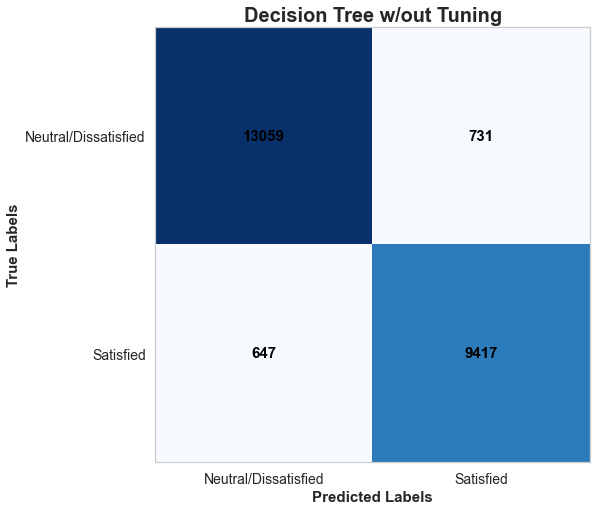

In [92]:
# get confusion matrix
cm_v = confusion_matrix(y_test, y_pred_dtv)

# plot confusion matrix
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm_v, cmap='Blues')
ax.grid(False)
ax.set_xlabel('Predicted Labels', fontweight='bold', fontsize='15')
ax.set_ylabel('True Labels', fontweight='bold', fontsize='15')
ax.set_title('Decision Tree w/out Tuning', fontweight='bold', fontsize='20')
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.xaxis.set(ticks=(0, 1), ticklabels=('Neutral/Dissatisfied', 'Satisfied'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Neutral/Dissatisfied', 'Satisfied'))
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)

for i in range(2):
    for j in range(2):
        ax.text(j, i, cm_v[i, j], ha='center', va='center', color='black', fontsize='15', weight='bold');

### Decision Tree with GridSearchCV

#### Train the Decision Tree 

In [93]:
# Initialize decision tree classifier 
dt = DecisionTreeClassifier(random_state=42)

# define the hyperparameters for tuning the model
params = {'max_depth': [2, 3, 5, 7, 9, 13, 20],
          'min_samples_split': [2, 5, 10, 12, 15, 20, 25, 30, 35, 50],
          'min_samples_leaf': [1, 2, 4]}

#Create a gridsearch object 
dt_gs = GridSearchCV(dt, params, cv=5)

#fit the gridsearch to the training data
dt_gs.fit(X_train_scaled, y_train)

# print the best hyperparameters and best score 
print("Best parameters: ", dt_gs.best_params_)

Best parameters:  {'max_depth': 13, 'min_samples_leaf': 2, 'min_samples_split': 30}


#### Run DecisionTree with Best Hyperparameters

In [94]:
dt_best = DecisionTreeClassifier(max_depth=13, 
                                 min_samples_leaf=2, 
                                 min_samples_split=30, 
                                 random_state=42)

dt_best.fit(X_train_scaled, y_train)

DecisionTreeClassifier(max_depth=13, min_samples_leaf=2, min_samples_split=30,
                       random_state=42)

#### Get Predictions

In [95]:
y_pred_gs = dt_best.predict(X_test_scaled)
y_pred_train_gs = dt_best.predict(X_train_scaled)

#### Classification Report on Training Data

In [96]:
conf_mat_gtrain = confusion_matrix(y_train, y_pred_train_gs)
class_rep_gtrain = classification_report(y_train, y_pred_train_gs, target_names=['neutral or dissatisfied', 'satisfied'])

print('Confusion Matrix:')
print(conf_mat_gtrain)

print('\nClassification Report: **Decision Tree On Training Data**')
print(class_rep_gtrain)

Confusion Matrix:
[[40253   734]
 [ 2362 28212]]

Classification Report: **Decision Tree On Training Data**
                         precision    recall  f1-score   support

neutral or dissatisfied       0.94      0.98      0.96     40987
              satisfied       0.97      0.92      0.95     30574

               accuracy                           0.96     71561
              macro avg       0.96      0.95      0.96     71561
           weighted avg       0.96      0.96      0.96     71561



#### Results on Training Data
- **Precision Score**: The precision for the "neutral or dissatisfied" class is 0.94, which means that 94% of the predictions for this class were correct.
- **Recall Score**: The recall for this class is 0.98, which means that 98% of the actual "neutral or dissatisfied" samples were correctly identified.
- **F1-Score**: The F1-score is the harmonic mean of precision and recall, and it is 0.96 for this class. 
- **Accuracy Score**: Accuracy is the proportion of correctly classified instances. On the training data, this model has an accuracy score of 0.96

#### Classification Report on Test Data

In [97]:
conf_mat_gtest = confusion_matrix(y_test, y_pred_gs)
class_rep_gtest = classification_report(y_test, y_pred_gs, target_names=['neutral or dissatisfied', 'satisfied'])

print('Confusion Matrix:')
print(conf_mat_gtest)

print('\nClassification Report: **Decision Tree On Test Data**')
print(class_rep_gtest)

Confusion Matrix:
[[13476   314]
 [  829  9235]]

Classification Report: **Decision Tree On Test Data**
                         precision    recall  f1-score   support

neutral or dissatisfied       0.94      0.98      0.96     13790
              satisfied       0.97      0.92      0.94     10064

               accuracy                           0.95     23854
              macro avg       0.95      0.95      0.95     23854
           weighted avg       0.95      0.95      0.95     23854



#### Results On Test Data:
- **Precision Score**: The precision of the model for neutral or dissatisfied customers is 94%, which means that out of all the customers predicted as neutral or dissatisfied, 94% were actually neutral or dissatisfied.
- **Recall Score**: The recall for neutral or dissatisfied customers is also 98%, which means that out of all the actual neutral or dissatisfied customers, 98% were correctly predicted as neutral or dissatisfied.
- **F1-Score**: The F1-score for neutral or dissatisfied customers is 96%.
- **Accuracy**: Overall accuracy of 95%, which means that 95% of the predictions made by the model on the test set were correct.

#### Calculate the AUC (area under the curve) to Check Predictive Performance.

In [98]:
# Check the AUC of predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_gs)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.9474285313659007

#### Confusion Matrix of Test Data

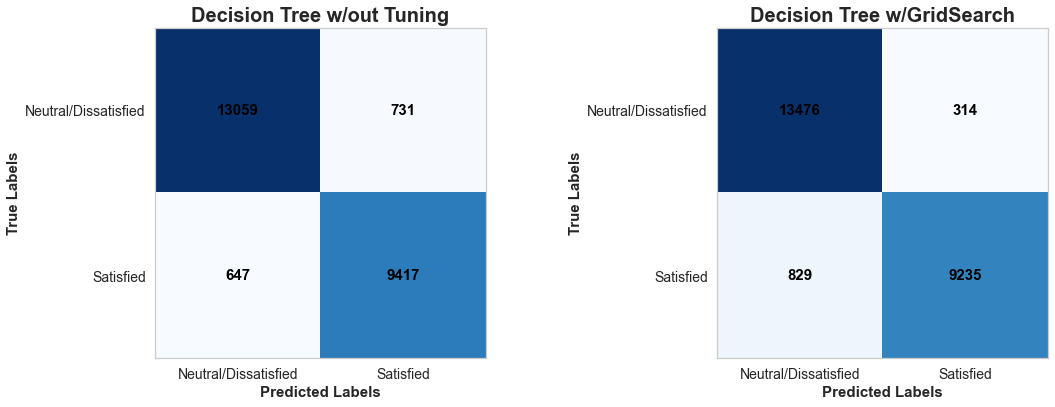

In [99]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))

# plot first confusion matrix
axs[0].imshow(cm_v, cmap='Blues')
axs[0].grid(False)
axs[0].set_xlabel('Predicted Labels', fontweight='bold', fontsize='15')
axs[0].set_ylabel('True Labels', fontweight='bold', fontsize='15')
axs[0].set_title('Decision Tree w/out Tuning', fontweight='bold', fontsize='20')
axs[0].set_xticks([0, 1])
axs[0].set_yticks([0, 1])
axs[0].xaxis.set(ticks=(0, 1), ticklabels=('Neutral/Dissatisfied', 'Satisfied'))
axs[0].yaxis.set(ticks=(0, 1), ticklabels=('Neutral/Dissatisfied', 'Satisfied'))
axs[0].xaxis.set_tick_params(labelsize=14)
axs[0].yaxis.set_tick_params(labelsize=14)

for i in range(2):
    for j in range(2):
        axs[0].text(j, i, cm_v[i, j], ha='center', va='center', color='black', fontsize='15', weight='bold');

# plot second confusion matrix
cm_gs = confusion_matrix(y_test, y_pred_gs)
axs[1].imshow(cm_gs, cmap='Blues')
axs[1].grid(False)
axs[1].set_xlabel('Predicted Labels', fontweight='bold', fontsize='15')
axs[1].set_ylabel('True Labels', fontweight='bold', fontsize='15')
axs[1].set_title('Decision Tree w/GridSearch', fontweight='bold', fontsize='20')
axs[1].set_xticks([0, 1])
axs[1].set_yticks([0, 1])
axs[1].xaxis.set(ticks=(0, 1), ticklabels=('Neutral/Dissatisfied', 'Satisfied'))
axs[1].yaxis.set(ticks=(0, 1), ticklabels=('Neutral/Dissatisfied', 'Satisfied'))
axs[1].xaxis.set_tick_params(labelsize=14)
axs[1].yaxis.set_tick_params(labelsize=14)

for i in range(2):
    for j in range(2):
        axs[1].text(j, i, cm_gs[i, j], ha='center', va='center', color='black', fontsize='15', weight='bold');
        
# adjust spacing between subplots
plt.subplots_adjust(wspace=0.7)

plt.show()


#### Confusion Matrix Results:
- When comparing the two confusion matrixis, the Decision Tree using GridSearch has the better results for my goals of finding the passengers that were neutral/dissatisfied.
    - The model is better at predicting true negatives, and has a lower number of false positives. This means that the model is better at reducing the number of passengers that were falsely predicted at satisfied when they were actually neutral/dissatisfied.  

### Decision Tree (No Tuning) Results:
- **<mark>Test Data</mark> Precision Score For Satisfied Class**: <mark>93%</mark> 
- **<mark>Test Data</mark> Precision Score For Neutral/Dissatisfied Class**: <mark>95%</mark> 
- **<mark>AUC Score</mark>**: <mark>94%</mark>

### Decision Tree With GridSearchCV Results:
- **<mark>Test Data</mark> Precision Score For Satisfied Class**: <mark>97%</mark> 
- **<mark>Test Data</mark> Precision Score For Neutral/Dissatisfied Class**: <mark>94%</mark> 
- **<mark>AUC Score</mark>**: <mark>95%</mark>

### Model 3: Random Forest
- Like the decision tree models, I will run a vanilla random forest classification model on the training and test data first. 
- I will follow it up with a second random forest classification model using GridSearchCV to see if we get more accuarate predictions. 

#### Initialize Random Forest Classifier With No Tuning

In [100]:
# Initialize random forest classifier
rf_vanilla = RandomForestClassifier(random_state=42)

# Fit the random forest object on the training data
rf_vanilla.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

#### Get Predictions For The Test And Training Data

In [101]:
y_pred_rfv = rf_vanilla.predict(X_test_scaled)
y_pred_train_rfv = rf_vanilla.predict(X_train_scaled)

#### Classification Report On Training Data
- Just like decision trees, random forest requires a lot of tuning to be accurate. Similar to our vanilla decision tree model, our vanilla random forest model gave us the same results on our training data, and shows signs of overfitting. 

In [102]:
conf_mat_vtrain = confusion_matrix(y_train, y_pred_train_rfv)
class_rep_vtrain = classification_report(y_train, y_pred_train_rfv, target_names=['neutral or dissatisfied', 'satisfied'])

print('Confusion Matrix:')
print(conf_mat_vtrain)

print('\nClassification Report: **Vanilla Random Forest On Training Data**')
print(class_rep_vtrain)

Confusion Matrix:
[[40986     1]
 [    1 30573]]

Classification Report: **Vanilla Random Forest On Training Data**
                         precision    recall  f1-score   support

neutral or dissatisfied       1.00      1.00      1.00     40987
              satisfied       1.00      1.00      1.00     30574

               accuracy                           1.00     71561
              macro avg       1.00      1.00      1.00     71561
           weighted avg       1.00      1.00      1.00     71561



#### Classification Report On Test Data

In [103]:
conf_mat_vtest = confusion_matrix(y_test, y_pred_rfv)
class_rep_vtest = classification_report(y_test, y_pred_rfv, target_names=['neutral or dissatisfied', 'satisfied'])

print('Confusion Matrix:')
print(conf_mat_vtest)

print('\nClassification Report: **Vanilla Random Forest On Test Data**')
print(class_rep_vtest)

Confusion Matrix:
[[13477   313]
 [  630  9434]]

Classification Report: **Vanilla Random Forest On Test Data**
                         precision    recall  f1-score   support

neutral or dissatisfied       0.96      0.98      0.97     13790
              satisfied       0.97      0.94      0.95     10064

               accuracy                           0.96     23854
              macro avg       0.96      0.96      0.96     23854
           weighted avg       0.96      0.96      0.96     23854



#### Calculate the AUC (area under the curve) to Check Predictive Performance.

In [104]:
# Check the AUC of predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_rfv)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.9573515144842407

#### Confusion Matrix of Random Forest w/out Tuning

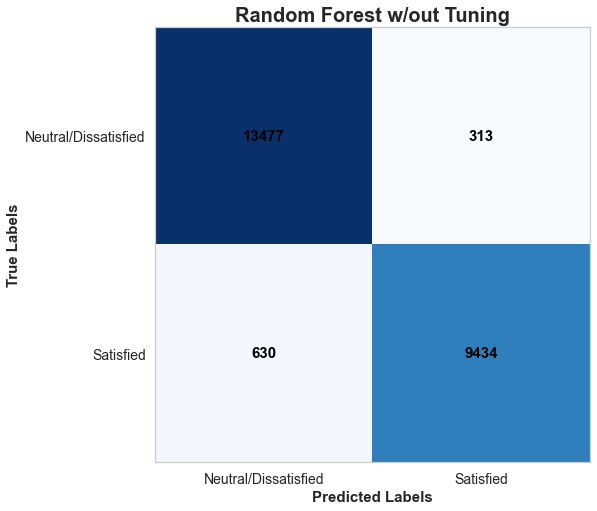

In [105]:
# get confusion matrix
cm_rfv = confusion_matrix(y_test, y_pred_rfv)

# plot confusion matrix
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm_rfv, cmap='Blues')
ax.grid(False)
ax.set_xlabel('Predicted Labels', fontweight='bold', fontsize='15')
ax.set_ylabel('True Labels', fontweight='bold', fontsize='15')
ax.set_title('Random Forest w/out Tuning', fontweight='bold', fontsize='20')
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.xaxis.set(ticks=(0, 1), ticklabels=('Neutral/Dissatisfied', 'Satisfied'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Neutral/Dissatisfied', 'Satisfied'))
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)

for i in range(2):
    for j in range(2):
        ax.text(j, i, cm_rfv[i, j], ha='center', va='center', color='black', fontsize='15', weight='bold');

### Random Forest with GridSearchCV

#### Initialize Random Forest Classifier 
- Use GridSearchCV to find the best hyperparameters to get the best model results.
- Due to a long run time compared to the GridSearch on the decision tree, I have removed min_samples_split because it is less critical than parameter. 
- I also decreased the max_depth to help shorten the run time. 

In [106]:
# Initialize random forest classifier
rf = RandomForestClassifier(random_state=42)

# define the hyperparamters for the tuning
params = {'criterion':['gini','entropy'],
          'n_estimators': [10, 12, 15, 20],
          'max_depth': [2, 3, 5, 7, 9],
          'min_samples_leaf': [1, 2, 4]
}

# create a GridSearchCV
rf_gs = GridSearchCV(rf, params, cv=5)

# fit gridsearch to the training data
rf_gs.fit(X_train_scaled, y_train)

print("Best parameters: ", rf_gs.best_params_)

Best parameters:  {'criterion': 'entropy', 'max_depth': 9, 'min_samples_leaf': 1, 'n_estimators': 10}


#### Run Random Forest with Best Hyperparameters

In [107]:
rf_best = RandomForestClassifier(criterion='entropy',
                            max_depth=9,
                            min_samples_leaf=1,
                            n_estimators=10,
                            random_state=42)
                    
rf_best.fit(X_train_scaled, y_train)

RandomForestClassifier(criterion='entropy', max_depth=9, n_estimators=10,
                       random_state=42)

#### Get Predictions

In [108]:
y_pred_rfgs = rf_best.predict(X_test_scaled)
y_pred_train_rfgs = rf_best.predict(X_train_scaled)

#### Classification Report On Training Data

In [109]:
conf_mat_gstrain = confusion_matrix(y_train, y_pred_train_rfgs)
class_rep_gstrain = classification_report(y_train, y_pred_train_rfgs, target_names=['neutral or dissatisfied', 'satisfied'])

print('Confusion Matrix:')
print(conf_mat_gstrain)

print('\nClassification Report: **Random Forest w/GridSearch On Training Data**')
print(class_rep_gstrain)

Confusion Matrix:
[[39234  1753]
 [ 2075 28499]]

Classification Report: **Random Forest w/GridSearch On Training Data**
                         precision    recall  f1-score   support

neutral or dissatisfied       0.95      0.96      0.95     40987
              satisfied       0.94      0.93      0.94     30574

               accuracy                           0.95     71561
              macro avg       0.95      0.94      0.95     71561
           weighted avg       0.95      0.95      0.95     71561



#### Results on Training Data:
- **Precision Score**: The precision for the "neutral or dissatisfied" class is 0.95, which means that 95% of the predictions for this class were correct.
- **Recall Score**: The recall for this class is 0.96, which means that 96% of the actual "neutral or dissatisfied" samples were correctly identified.
- **F1-Score**: The F1-score is the harmonic mean of precision and recall, and it is 0.95 for this class. 
- **Accuracy Score**: Accuracy is the proportion of correctly classified instances. On the training data, this model has an accuracy score of 0.95

#### Classification Report On Test Data

In [110]:
conf_mat_gstest = confusion_matrix(y_test, y_pred_rfgs)
class_rep_gstest = classification_report(y_test, y_pred_rfgs, target_names=['neutral or dissatisfied', 'satisfied'])

print('Confusion Matrix:')
print(conf_mat_gstest)

print('\nClassification Report: **Random Forest w/GidSearch On Test Data**')
print(class_rep_gstest)

Confusion Matrix:
[[13161   629]
 [  707  9357]]

Classification Report: **Random Forest w/GidSearch On Test Data**
                         precision    recall  f1-score   support

neutral or dissatisfied       0.95      0.95      0.95     13790
              satisfied       0.94      0.93      0.93     10064

               accuracy                           0.94     23854
              macro avg       0.94      0.94      0.94     23854
           weighted avg       0.94      0.94      0.94     23854



#### Results On Test Data:
- **Precision Score**: The precision of the model for neutral or dissatisfied customers is 95%, which means that out of all the customers predicted as neutral or dissatisfied, 95% were actually neutral or dissatisfied.
- **Recall Score**: The recall for neutral or dissatisfied customers is also 95%, which means that out of all the actual neutral or dissatisfied customers, 95% were correctly predicted as neutral or dissatisfied.
- **F1-Score**: The F1-score for neutral or dissatisfied customers is 95%.
- **Accuracy**: Overall accuracy of 94%, which means that 94% of the predictions made by the model on the test set were correct.

#### Calculate the AUC (area under the curve) to Check Predictive Performance.

In [111]:
# Check the AUC of predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_rfgs)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.9420684198360372

#### Confusion Matrix On Test Data

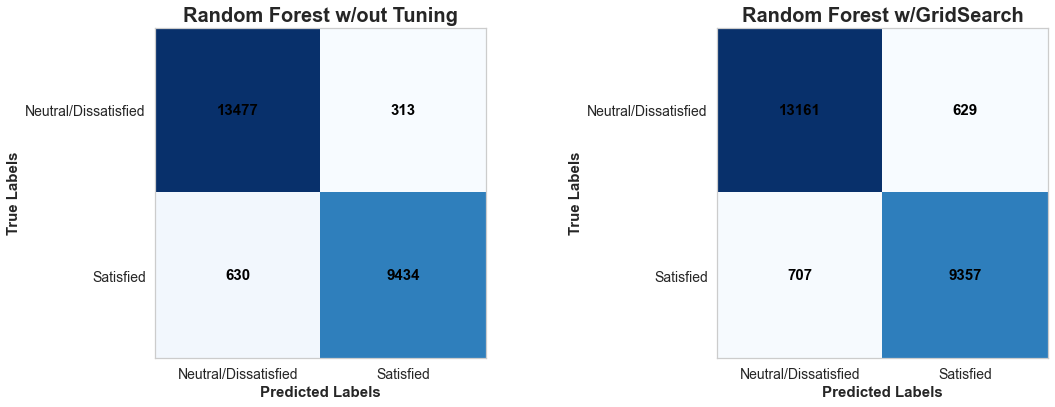

In [112]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))

# plot first confusion matrix
axs[0].imshow(cm_rfv, cmap='Blues')
axs[0].grid(False)
axs[0].set_xlabel('Predicted Labels', fontweight='bold', fontsize='15')
axs[0].set_ylabel('True Labels', fontweight='bold', fontsize='15')
axs[0].set_title('Random Forest w/out Tuning', fontweight='bold', fontsize='20')
axs[0].set_xticks([0, 1])
axs[0].set_yticks([0, 1])
axs[0].xaxis.set(ticks=(0, 1), ticklabels=('Neutral/Dissatisfied', 'Satisfied'))
axs[0].yaxis.set(ticks=(0, 1), ticklabels=('Neutral/Dissatisfied', 'Satisfied'))
axs[0].xaxis.set_tick_params(labelsize=14)
axs[0].yaxis.set_tick_params(labelsize=14)

for i in range(2):
    for j in range(2):
        axs[0].text(j, i, cm_rfv[i, j], ha='center', va='center', color='black', fontsize='15', weight='bold');

# plot second confusion matrix
cm_rfgs = confusion_matrix(y_test, y_pred_rfgs)
axs[1].imshow(cm_rfgs, cmap='Blues')
axs[1].grid(False)
axs[1].set_xlabel('Predicted Labels', fontweight='bold', fontsize='15')
axs[1].set_ylabel('True Labels', fontweight='bold', fontsize='15')
axs[1].set_title('Random Forest w/GridSearch', fontweight='bold', fontsize='20')
axs[1].set_xticks([0, 1])
axs[1].set_yticks([0, 1])
axs[1].xaxis.set(ticks=(0, 1), ticklabels=('Neutral/Dissatisfied', 'Satisfied'))
axs[1].yaxis.set(ticks=(0, 1), ticklabels=('Neutral/Dissatisfied', 'Satisfied'))
axs[1].xaxis.set_tick_params(labelsize=14)
axs[1].yaxis.set_tick_params(labelsize=14)

for i in range(2):
    for j in range(2):
        axs[1].text(j, i, cm_rfgs[i, j], ha='center', va='center', color='black', fontsize='15', weight='bold');
        
# adjust spacing between subplots
plt.subplots_adjust(wspace=0.7)

plt.show()


#### Confusion Matrix Results:
- The Random Forest model although showed high precision and recall scores, does not do very well at predicting false positive. 
- It also shows signs of overfitting. 

### Random Forest (No Tuning) Results:
- **<mark>Test Data</mark> Precision Score For Satisfied Class**: <mark>97%</mark> 
- **<mark>Test Data</mark> Precision Score For Neutral/Dissatisfied Class**: <mark>95%</mark> 
- **<mark>AUC Score</mark>**: <mark>95%</mark>

### Random Forest With GridSearchCV Results:
- **<mark>Test Data</mark> Precision Score For Satisfied Class**: <mark>94%</mark> 
- **<mark>Test Data</mark> Precision Score For Neutral/Dissatisfied Class**: <mark>95%</mark> 
- **<mark>AUC Score</mark>**: <mark>94%</mark>

### Model 4: CatBoost Classifier

#### Initialize CatBoost Classifier:

In [113]:
# Initialize CatBoostClassifier
cbc = ctb.CatBoostClassifier()

# Fit the classifier on the training data
cbc.fit(X_train_scaled, y_train)

print(cbc)

Learning rate set to 0.063809
0:	learn: 0.6065794	total: 94ms	remaining: 1m 33s
1:	learn: 0.5134799	total: 102ms	remaining: 51.1s
2:	learn: 0.4534467	total: 113ms	remaining: 37.4s
3:	learn: 0.4094018	total: 120ms	remaining: 30s
4:	learn: 0.3748386	total: 128ms	remaining: 25.5s
5:	learn: 0.3256480	total: 136ms	remaining: 22.5s
6:	learn: 0.2919575	total: 144ms	remaining: 20.4s
7:	learn: 0.2750641	total: 151ms	remaining: 18.8s
8:	learn: 0.2583036	total: 159ms	remaining: 17.5s
9:	learn: 0.2454043	total: 168ms	remaining: 16.6s
10:	learn: 0.2301590	total: 184ms	remaining: 16.5s
11:	learn: 0.2208343	total: 198ms	remaining: 16.3s
12:	learn: 0.2137829	total: 207ms	remaining: 15.7s
13:	learn: 0.2070581	total: 215ms	remaining: 15.2s
14:	learn: 0.1984899	total: 224ms	remaining: 14.7s
15:	learn: 0.1936717	total: 231ms	remaining: 14.2s
16:	learn: 0.1891059	total: 240ms	remaining: 13.9s
17:	learn: 0.1855479	total: 247ms	remaining: 13.5s
18:	learn: 0.1809016	total: 255ms	remaining: 13.2s
19:	learn: 0.

167:	learn: 0.0992178	total: 1.58s	remaining: 7.84s
168:	learn: 0.0991243	total: 1.6s	remaining: 7.86s
169:	learn: 0.0990545	total: 1.6s	remaining: 7.84s
170:	learn: 0.0989297	total: 1.61s	remaining: 7.82s
171:	learn: 0.0988131	total: 1.62s	remaining: 7.8s
172:	learn: 0.0987294	total: 1.63s	remaining: 7.78s
173:	learn: 0.0986618	total: 1.64s	remaining: 7.77s
174:	learn: 0.0985352	total: 1.64s	remaining: 7.75s
175:	learn: 0.0983675	total: 1.65s	remaining: 7.73s
176:	learn: 0.0982616	total: 1.66s	remaining: 7.71s
177:	learn: 0.0981708	total: 1.67s	remaining: 7.69s
178:	learn: 0.0981014	total: 1.67s	remaining: 7.68s
179:	learn: 0.0979873	total: 1.68s	remaining: 7.66s
180:	learn: 0.0978721	total: 1.69s	remaining: 7.65s
181:	learn: 0.0977341	total: 1.7s	remaining: 7.63s
182:	learn: 0.0975653	total: 1.71s	remaining: 7.61s
183:	learn: 0.0973286	total: 1.71s	remaining: 7.59s
184:	learn: 0.0972294	total: 1.72s	remaining: 7.58s
185:	learn: 0.0971660	total: 1.73s	remaining: 7.56s
186:	learn: 0.09

342:	learn: 0.0866043	total: 2.97s	remaining: 5.68s
343:	learn: 0.0865285	total: 2.98s	remaining: 5.68s
344:	learn: 0.0865047	total: 2.99s	remaining: 5.68s
345:	learn: 0.0864357	total: 3s	remaining: 5.67s
346:	learn: 0.0864091	total: 3.01s	remaining: 5.66s
347:	learn: 0.0863713	total: 3.01s	remaining: 5.65s
348:	learn: 0.0863284	total: 3.02s	remaining: 5.64s
349:	learn: 0.0861861	total: 3.03s	remaining: 5.63s
350:	learn: 0.0861212	total: 3.04s	remaining: 5.61s
351:	learn: 0.0860825	total: 3.04s	remaining: 5.6s
352:	learn: 0.0860593	total: 3.05s	remaining: 5.59s
353:	learn: 0.0860129	total: 3.06s	remaining: 5.58s
354:	learn: 0.0859553	total: 3.07s	remaining: 5.57s
355:	learn: 0.0859133	total: 3.07s	remaining: 5.56s
356:	learn: 0.0858914	total: 3.08s	remaining: 5.56s
357:	learn: 0.0858147	total: 3.1s	remaining: 5.55s
358:	learn: 0.0857572	total: 3.1s	remaining: 5.54s
359:	learn: 0.0857103	total: 3.11s	remaining: 5.53s
360:	learn: 0.0856794	total: 3.12s	remaining: 5.52s
361:	learn: 0.0856

516:	learn: 0.0794787	total: 4.37s	remaining: 4.08s
517:	learn: 0.0794566	total: 4.38s	remaining: 4.08s
518:	learn: 0.0794263	total: 4.39s	remaining: 4.07s
519:	learn: 0.0794034	total: 4.4s	remaining: 4.06s
520:	learn: 0.0793740	total: 4.41s	remaining: 4.05s
521:	learn: 0.0793225	total: 4.41s	remaining: 4.04s
522:	learn: 0.0792723	total: 4.42s	remaining: 4.03s
523:	learn: 0.0792331	total: 4.43s	remaining: 4.02s
524:	learn: 0.0792199	total: 4.43s	remaining: 4.01s
525:	learn: 0.0791797	total: 4.44s	remaining: 4s
526:	learn: 0.0791666	total: 4.45s	remaining: 3.99s
527:	learn: 0.0791212	total: 4.46s	remaining: 3.98s
528:	learn: 0.0790849	total: 4.46s	remaining: 3.98s
529:	learn: 0.0790561	total: 4.47s	remaining: 3.97s
530:	learn: 0.0790251	total: 4.48s	remaining: 3.96s
531:	learn: 0.0790045	total: 4.49s	remaining: 3.95s
532:	learn: 0.0789778	total: 4.5s	remaining: 3.94s
533:	learn: 0.0789165	total: 4.5s	remaining: 3.93s
534:	learn: 0.0788896	total: 4.51s	remaining: 3.92s
535:	learn: 0.0788

695:	learn: 0.0743793	total: 5.77s	remaining: 2.52s
696:	learn: 0.0743485	total: 5.79s	remaining: 2.52s
697:	learn: 0.0743128	total: 5.8s	remaining: 2.51s
698:	learn: 0.0742896	total: 5.82s	remaining: 2.5s
699:	learn: 0.0742616	total: 5.83s	remaining: 2.5s
700:	learn: 0.0742219	total: 5.84s	remaining: 2.49s
701:	learn: 0.0741948	total: 5.85s	remaining: 2.48s
702:	learn: 0.0741685	total: 5.86s	remaining: 2.48s
703:	learn: 0.0741418	total: 5.87s	remaining: 2.47s
704:	learn: 0.0741278	total: 5.89s	remaining: 2.46s
705:	learn: 0.0741037	total: 5.9s	remaining: 2.46s
706:	learn: 0.0740602	total: 5.91s	remaining: 2.45s
707:	learn: 0.0740423	total: 5.93s	remaining: 2.44s
708:	learn: 0.0740211	total: 5.95s	remaining: 2.44s
709:	learn: 0.0739993	total: 5.96s	remaining: 2.44s
710:	learn: 0.0739833	total: 6.01s	remaining: 2.44s
711:	learn: 0.0739529	total: 6.02s	remaining: 2.44s
712:	learn: 0.0739294	total: 6.05s	remaining: 2.44s
713:	learn: 0.0739056	total: 6.09s	remaining: 2.44s
714:	learn: 0.07

857:	learn: 0.0707973	total: 7.84s	remaining: 1.3s
858:	learn: 0.0707777	total: 7.85s	remaining: 1.29s
859:	learn: 0.0707589	total: 7.86s	remaining: 1.28s
860:	learn: 0.0707486	total: 7.87s	remaining: 1.27s
861:	learn: 0.0707300	total: 7.88s	remaining: 1.26s
862:	learn: 0.0707116	total: 7.88s	remaining: 1.25s
863:	learn: 0.0706933	total: 7.89s	remaining: 1.24s
864:	learn: 0.0706741	total: 7.9s	remaining: 1.23s
865:	learn: 0.0706487	total: 7.91s	remaining: 1.22s
866:	learn: 0.0706345	total: 7.91s	remaining: 1.21s
867:	learn: 0.0706102	total: 7.92s	remaining: 1.2s
868:	learn: 0.0705927	total: 7.93s	remaining: 1.2s
869:	learn: 0.0705730	total: 7.94s	remaining: 1.19s
870:	learn: 0.0705303	total: 7.94s	remaining: 1.18s
871:	learn: 0.0705119	total: 7.95s	remaining: 1.17s
872:	learn: 0.0705004	total: 7.96s	remaining: 1.16s
873:	learn: 0.0704829	total: 7.97s	remaining: 1.15s
874:	learn: 0.0704661	total: 7.97s	remaining: 1.14s
875:	learn: 0.0704462	total: 7.98s	remaining: 1.13s
876:	learn: 0.07

#### Get Predictions for Training and Test Data

In [114]:
# Make predictions on the training and test data
y_pred_cbv = cbc.predict(X_test_scaled)
y_pred_train_cbv = cbc.predict(X_train_scaled)

#### Classification Report On Training Data

In [115]:
conf_mat_cbvt = confusion_matrix(y_train, y_pred_train_cbv)
class_rep_cbvt = classification_report(y_train, y_pred_train_cbv, target_names=['neutral or dissatisfied', 'satisfied'])

print('Confusion Matrix:')
print(conf_mat_cbvt)

print('\nClassification Report: **CatBoost w/out Tuning On Training Data**')
print(class_rep_cbvt)

Confusion Matrix:
[[40523   464]
 [ 1469 29105]]

Classification Report: **CatBoost w/out Tuning On Training Data**
                         precision    recall  f1-score   support

neutral or dissatisfied       0.97      0.99      0.98     40987
              satisfied       0.98      0.95      0.97     30574

               accuracy                           0.97     71561
              macro avg       0.97      0.97      0.97     71561
           weighted avg       0.97      0.97      0.97     71561



#### Results on Training Data:
- **Precision Score**: The precision for the "neutral or dissatisfied" class is 0.97, which means that 97% of the predictions for this class were correct.
- **Recall Score**: The recall for this class is 0.99, which means that 99% of the actual "neutral or dissatisfied" samples were correctly identified.
- **F1-Score**: The F1-score is the harmonic mean of precision and recall, and it is 0.98 for this class. 
- **Accuracy Score**: Accuracy is the proportion of correctly classified instances. On the training data, this model has an accuracy score of 0.97

#### Classification Report on Test Data: 

In [116]:
conf_mat_cbvtest = confusion_matrix(y_test, y_pred_cbv)
class_rep_cbvtest = classification_report(y_test, y_pred_cbv, target_names=['neutral or dissatisfied', 'satisfied'])

print('Confusion Matrix:')
print(conf_mat_cbvtest)

print('\nClassification Report: **CatBoost w/out Tuning On Test Data**')
print(class_rep_cbvtest)

Confusion Matrix:
[[13510   280]
 [  643  9421]]

Classification Report: **CatBoost w/out Tuning On Test Data**
                         precision    recall  f1-score   support

neutral or dissatisfied       0.95      0.98      0.97     13790
              satisfied       0.97      0.94      0.95     10064

               accuracy                           0.96     23854
              macro avg       0.96      0.96      0.96     23854
           weighted avg       0.96      0.96      0.96     23854



#### Results On Test Data:
- **Precision Score**: The precision of the model for neutral or dissatisfied customers is 94%, which means that out of all the customers predicted as neutral or dissatisfied, 94% were actually neutral or dissatisfied.
- **Recall Score**: The recall for neutral or dissatisfied customers is also 97%, which means that out of all the actual neutral or dissatisfied customers, 97% were correctly predicted as neutral or dissatisfied.
- **F1-Score**: The F1-score for neutral or dissatisfied customers is 95%.
- **Accuracy**: Overall accuracy of 94%, which means that 94% of the predictions made by the model on the test set were correct.

#### Calculate the AUC (area under the curve) to Check Predictive Performance.

In [117]:
# Check the AUC of predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_cbv)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.9579021672463746

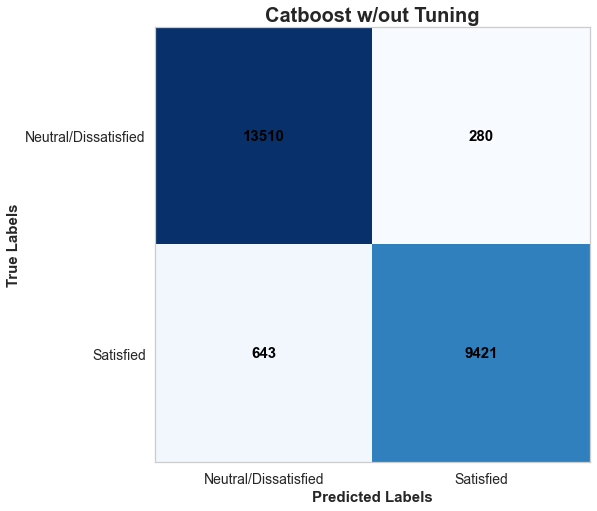

In [118]:
# get confusion matrix
cm_cbv = confusion_matrix(y_test, y_pred_cbv)

# plot confusion matrix
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm_cbv, cmap='Blues')
ax.grid(False)
ax.set_xlabel('Predicted Labels', fontweight='bold', fontsize='15')
ax.set_ylabel('True Labels', fontweight='bold', fontsize='15')
ax.set_title('Catboost w/out Tuning', fontweight='bold', fontsize='20')
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.xaxis.set(ticks=(0, 1), ticklabels=('Neutral/Dissatisfied', 'Satisfied'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Neutral/Dissatisfied', 'Satisfied'))
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)

for i in range(2):
    for j in range(2):
        ax.text(j, i, cm_cbv[i, j], ha='center', va='center', color='black', fontsize='15', weight='bold');

### CatBoost with RandomSearchCV
- RandomSearchCV is similar to GridSearchCV, however RandomSearchCV performs a random search over the parameter space, rather than an exhaustive search like GridSearchCV performs. 
- RandomSearchCV is much less computationally expensive making it perform faster, especially for larger datasets. 

In [119]:
# Define the hyperparameters to search
param_dist = {
    'iterations': sp_randint(500, 2000),
    'learning_rate': [0.01, 0.1, 1],
    'depth': sp_randint(4, 10),
    'random_strength': [0, 1, 3, 5, 7, 9], 
    'l2_leaf_reg': [2, 4, 6, 8, 10]
}

# Create a CatBoost classifier object
cbc = ctb.CatBoostClassifier()

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(
    estimator=cbc,
    param_distributions=param_dist,
    n_iter=50,
    cv=5,
    n_jobs=-1,
    verbose=1,
    random_state=42
)

# Fit the random search object to the training data
random_search.fit(X_train_scaled, y_train)

# Print the best hyperparameters and score
print("Best hyperparameters:", random_search.best_params_)
print("Best score:", random_search.best_score_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 25.6min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed: 33.8min finished


0:	learn: 0.6725098	total: 21.5ms	remaining: 29s
1:	learn: 0.6526520	total: 38.3ms	remaining: 25.9s
2:	learn: 0.6335556	total: 61.4ms	remaining: 27.7s
3:	learn: 0.6151941	total: 79.8ms	remaining: 26.9s
4:	learn: 0.5975674	total: 98.2ms	remaining: 26.5s
5:	learn: 0.5807236	total: 112ms	remaining: 25.2s
6:	learn: 0.5645610	total: 126ms	remaining: 24.3s
7:	learn: 0.5489352	total: 141ms	remaining: 23.6s
8:	learn: 0.5340390	total: 155ms	remaining: 23.1s
9:	learn: 0.5194332	total: 169ms	remaining: 22.7s
10:	learn: 0.5059459	total: 183ms	remaining: 22.4s
11:	learn: 0.4921497	total: 197ms	remaining: 22.1s
12:	learn: 0.4792238	total: 211ms	remaining: 21.8s
13:	learn: 0.4668578	total: 228ms	remaining: 21.8s
14:	learn: 0.4549324	total: 249ms	remaining: 22.2s
15:	learn: 0.4435186	total: 266ms	remaining: 22.2s
16:	learn: 0.4327813	total: 280ms	remaining: 22s
17:	learn: 0.4227027	total: 295ms	remaining: 21.9s
18:	learn: 0.4144472	total: 310ms	remaining: 21.8s
19:	learn: 0.4046409	total: 325ms	remain

161:	learn: 0.1337163	total: 2.52s	remaining: 18.5s
162:	learn: 0.1334496	total: 2.54s	remaining: 18.5s
163:	learn: 0.1332259	total: 2.55s	remaining: 18.5s
164:	learn: 0.1329458	total: 2.57s	remaining: 18.5s
165:	learn: 0.1326134	total: 2.58s	remaining: 18.5s
166:	learn: 0.1323990	total: 2.6s	remaining: 18.5s
167:	learn: 0.1321515	total: 2.61s	remaining: 18.4s
168:	learn: 0.1318326	total: 2.63s	remaining: 18.4s
169:	learn: 0.1316041	total: 2.64s	remaining: 18.4s
170:	learn: 0.1313680	total: 2.65s	remaining: 18.4s
171:	learn: 0.1310991	total: 2.67s	remaining: 18.3s
172:	learn: 0.1308714	total: 2.68s	remaining: 18.3s
173:	learn: 0.1306393	total: 2.7s	remaining: 18.3s
174:	learn: 0.1304260	total: 2.71s	remaining: 18.3s
175:	learn: 0.1301768	total: 2.73s	remaining: 18.3s
176:	learn: 0.1299787	total: 2.74s	remaining: 18.3s
177:	learn: 0.1296876	total: 2.76s	remaining: 18.2s
178:	learn: 0.1294760	total: 2.77s	remaining: 18.2s
179:	learn: 0.1292387	total: 2.79s	remaining: 18.2s
180:	learn: 0.

325:	learn: 0.1079853	total: 5.02s	remaining: 15.8s
326:	learn: 0.1078951	total: 5.03s	remaining: 15.8s
327:	learn: 0.1077749	total: 5.05s	remaining: 15.8s
328:	learn: 0.1076810	total: 5.06s	remaining: 15.8s
329:	learn: 0.1075683	total: 5.08s	remaining: 15.8s
330:	learn: 0.1075105	total: 5.09s	remaining: 15.7s
331:	learn: 0.1074238	total: 5.11s	remaining: 15.7s
332:	learn: 0.1073531	total: 5.12s	remaining: 15.7s
333:	learn: 0.1072684	total: 5.14s	remaining: 15.7s
334:	learn: 0.1071594	total: 5.15s	remaining: 15.7s
335:	learn: 0.1070945	total: 5.17s	remaining: 15.6s
336:	learn: 0.1070122	total: 5.18s	remaining: 15.6s
337:	learn: 0.1069234	total: 5.19s	remaining: 15.6s
338:	learn: 0.1068180	total: 5.21s	remaining: 15.6s
339:	learn: 0.1067238	total: 5.22s	remaining: 15.6s
340:	learn: 0.1066378	total: 5.24s	remaining: 15.6s
341:	learn: 0.1065698	total: 5.26s	remaining: 15.6s
342:	learn: 0.1064691	total: 5.27s	remaining: 15.5s
343:	learn: 0.1063833	total: 5.29s	remaining: 15.5s
344:	learn: 

486:	learn: 0.0973855	total: 7.54s	remaining: 13.4s
487:	learn: 0.0973340	total: 7.56s	remaining: 13.4s
488:	learn: 0.0972784	total: 7.57s	remaining: 13.4s
489:	learn: 0.0972378	total: 7.59s	remaining: 13.4s
490:	learn: 0.0971791	total: 7.6s	remaining: 13.4s
491:	learn: 0.0971275	total: 7.62s	remaining: 13.3s
492:	learn: 0.0970843	total: 7.63s	remaining: 13.3s
493:	learn: 0.0970395	total: 7.64s	remaining: 13.3s
494:	learn: 0.0969823	total: 7.66s	remaining: 13.3s
495:	learn: 0.0969353	total: 7.67s	remaining: 13.3s
496:	learn: 0.0968654	total: 7.69s	remaining: 13.3s
497:	learn: 0.0968132	total: 7.7s	remaining: 13.2s
498:	learn: 0.0967648	total: 7.72s	remaining: 13.2s
499:	learn: 0.0967189	total: 7.73s	remaining: 13.2s
500:	learn: 0.0966596	total: 7.75s	remaining: 13.2s
501:	learn: 0.0966057	total: 7.77s	remaining: 13.2s
502:	learn: 0.0965502	total: 7.78s	remaining: 13.2s
503:	learn: 0.0964947	total: 7.8s	remaining: 13.2s
504:	learn: 0.0964551	total: 7.81s	remaining: 13.1s
505:	learn: 0.0

650:	learn: 0.0908559	total: 10s	remaining: 10.8s
651:	learn: 0.0908092	total: 10.1s	remaining: 10.8s
652:	learn: 0.0907794	total: 10.1s	remaining: 10.8s
653:	learn: 0.0907507	total: 10.1s	remaining: 10.8s
654:	learn: 0.0907123	total: 10.1s	remaining: 10.8s
655:	learn: 0.0906915	total: 10.1s	remaining: 10.8s
656:	learn: 0.0906512	total: 10.1s	remaining: 10.8s
657:	learn: 0.0906105	total: 10.2s	remaining: 10.7s
658:	learn: 0.0905802	total: 10.2s	remaining: 10.7s
659:	learn: 0.0905496	total: 10.2s	remaining: 10.7s
660:	learn: 0.0905152	total: 10.2s	remaining: 10.7s
661:	learn: 0.0904826	total: 10.2s	remaining: 10.7s
662:	learn: 0.0904588	total: 10.2s	remaining: 10.7s
663:	learn: 0.0904058	total: 10.2s	remaining: 10.6s
664:	learn: 0.0903760	total: 10.3s	remaining: 10.6s
665:	learn: 0.0903482	total: 10.3s	remaining: 10.6s
666:	learn: 0.0903293	total: 10.3s	remaining: 10.6s
667:	learn: 0.0902932	total: 10.3s	remaining: 10.6s
668:	learn: 0.0902605	total: 10.3s	remaining: 10.6s
669:	learn: 0.

818:	learn: 0.0864268	total: 12.5s	remaining: 8.19s
819:	learn: 0.0864018	total: 12.6s	remaining: 8.18s
820:	learn: 0.0863802	total: 12.6s	remaining: 8.16s
821:	learn: 0.0863488	total: 12.6s	remaining: 8.15s
822:	learn: 0.0863276	total: 12.6s	remaining: 8.13s
823:	learn: 0.0863103	total: 12.6s	remaining: 8.12s
824:	learn: 0.0862787	total: 12.6s	remaining: 8.1s
825:	learn: 0.0862624	total: 12.7s	remaining: 8.09s
826:	learn: 0.0862453	total: 12.7s	remaining: 8.07s
827:	learn: 0.0862169	total: 12.7s	remaining: 8.05s
828:	learn: 0.0861922	total: 12.7s	remaining: 8.04s
829:	learn: 0.0861791	total: 12.7s	remaining: 8.02s
830:	learn: 0.0861536	total: 12.7s	remaining: 8.01s
831:	learn: 0.0861285	total: 12.7s	remaining: 7.99s
832:	learn: 0.0861153	total: 12.8s	remaining: 7.98s
833:	learn: 0.0860986	total: 12.8s	remaining: 7.96s
834:	learn: 0.0860771	total: 12.8s	remaining: 7.95s
835:	learn: 0.0860614	total: 12.8s	remaining: 7.93s
836:	learn: 0.0860448	total: 12.8s	remaining: 7.91s
837:	learn: 0

983:	learn: 0.0831510	total: 15s	remaining: 5.65s
984:	learn: 0.0831355	total: 15s	remaining: 5.64s
985:	learn: 0.0831183	total: 15.1s	remaining: 5.62s
986:	learn: 0.0831023	total: 15.1s	remaining: 5.61s
987:	learn: 0.0830772	total: 15.1s	remaining: 5.59s
988:	learn: 0.0830636	total: 15.1s	remaining: 5.57s
989:	learn: 0.0830464	total: 15.1s	remaining: 5.56s
990:	learn: 0.0830287	total: 15.1s	remaining: 5.54s
991:	learn: 0.0830066	total: 15.1s	remaining: 5.53s
992:	learn: 0.0829913	total: 15.2s	remaining: 5.51s
993:	learn: 0.0829742	total: 15.2s	remaining: 5.5s
994:	learn: 0.0829593	total: 15.2s	remaining: 5.48s
995:	learn: 0.0829489	total: 15.2s	remaining: 5.46s
996:	learn: 0.0829298	total: 15.2s	remaining: 5.45s
997:	learn: 0.0829168	total: 15.2s	remaining: 5.43s
998:	learn: 0.0828948	total: 15.3s	remaining: 5.42s
999:	learn: 0.0828809	total: 15.3s	remaining: 5.4s
1000:	learn: 0.0828653	total: 15.3s	remaining: 5.39s
1001:	learn: 0.0828499	total: 15.3s	remaining: 5.37s
1002:	learn: 0.0

1148:	learn: 0.0800696	total: 17.5s	remaining: 3.12s
1149:	learn: 0.0800539	total: 17.5s	remaining: 3.1s
1150:	learn: 0.0800444	total: 17.5s	remaining: 3.09s
1151:	learn: 0.0800264	total: 17.5s	remaining: 3.07s
1152:	learn: 0.0800023	total: 17.5s	remaining: 3.06s
1153:	learn: 0.0799909	total: 17.6s	remaining: 3.04s
1154:	learn: 0.0799711	total: 17.6s	remaining: 3.03s
1155:	learn: 0.0799545	total: 17.6s	remaining: 3.01s
1156:	learn: 0.0799345	total: 17.6s	remaining: 3s
1157:	learn: 0.0799216	total: 17.6s	remaining: 2.98s
1158:	learn: 0.0799081	total: 17.6s	remaining: 2.97s
1159:	learn: 0.0798918	total: 17.6s	remaining: 2.95s
1160:	learn: 0.0798771	total: 17.7s	remaining: 2.94s
1161:	learn: 0.0798575	total: 17.7s	remaining: 2.92s
1162:	learn: 0.0798458	total: 17.7s	remaining: 2.9s
1163:	learn: 0.0798142	total: 17.7s	remaining: 2.89s
1164:	learn: 0.0798005	total: 17.7s	remaining: 2.88s
1165:	learn: 0.0797857	total: 17.7s	remaining: 2.86s
1166:	learn: 0.0797744	total: 17.8s	remaining: 2.84

1316:	learn: 0.0771858	total: 20s	remaining: 561ms
1317:	learn: 0.0771719	total: 20s	remaining: 546ms
1318:	learn: 0.0771485	total: 20s	remaining: 531ms
1319:	learn: 0.0771330	total: 20s	remaining: 516ms
1320:	learn: 0.0771180	total: 20s	remaining: 501ms
1321:	learn: 0.0771081	total: 20.1s	remaining: 485ms
1322:	learn: 0.0770936	total: 20.1s	remaining: 470ms
1323:	learn: 0.0770776	total: 20.1s	remaining: 455ms
1324:	learn: 0.0770642	total: 20.1s	remaining: 440ms
1325:	learn: 0.0770427	total: 20.1s	remaining: 425ms
1326:	learn: 0.0770331	total: 20.1s	remaining: 410ms
1327:	learn: 0.0770235	total: 20.1s	remaining: 394ms
1328:	learn: 0.0770141	total: 20.2s	remaining: 379ms
1329:	learn: 0.0769972	total: 20.2s	remaining: 364ms
1330:	learn: 0.0769754	total: 20.2s	remaining: 349ms
1331:	learn: 0.0769621	total: 20.2s	remaining: 334ms
1332:	learn: 0.0769544	total: 20.2s	remaining: 319ms
1333:	learn: 0.0769349	total: 20.2s	remaining: 303ms
1334:	learn: 0.0769138	total: 20.3s	remaining: 288ms
133

#### Initialize CatBoostClassifier with New Hyperparameters

In [120]:
# Run CatBoostClassifier with the new hyperparameters
cbc_best = ctb.CatBoostClassifier(depth=9,
                                  iterations=1354,
                                  l2_leaf_reg=10,
                                  random_strength=0,
                                  learning_rate=0.01,
                                  random_state=42
                                  )

# Fit the Model with the training data
cbc_best.fit(X_train_scaled, y_train)

0:	learn: 0.6725098	total: 16.5ms	remaining: 22.3s
1:	learn: 0.6526520	total: 31.1ms	remaining: 21s
2:	learn: 0.6335556	total: 47.5ms	remaining: 21.4s
3:	learn: 0.6151941	total: 62.6ms	remaining: 21.1s
4:	learn: 0.5975674	total: 76.8ms	remaining: 20.7s
5:	learn: 0.5807236	total: 91ms	remaining: 20.4s
6:	learn: 0.5644639	total: 106ms	remaining: 20.3s
7:	learn: 0.5489380	total: 120ms	remaining: 20.2s
8:	learn: 0.5339409	total: 139ms	remaining: 20.7s
9:	learn: 0.5193416	total: 162ms	remaining: 21.8s
10:	learn: 0.5055979	total: 188ms	remaining: 23s
11:	learn: 0.4921483	total: 204ms	remaining: 22.8s
12:	learn: 0.4792653	total: 220ms	remaining: 22.7s
13:	learn: 0.4668586	total: 246ms	remaining: 23.5s
14:	learn: 0.4549338	total: 262ms	remaining: 23.4s
15:	learn: 0.4435240	total: 277ms	remaining: 23.2s
16:	learn: 0.4330124	total: 291ms	remaining: 22.9s
17:	learn: 0.4243750	total: 305ms	remaining: 22.7s
18:	learn: 0.4142067	total: 320ms	remaining: 22.5s
19:	learn: 0.4044111	total: 333ms	remaini

169:	learn: 0.1313827	total: 2.77s	remaining: 19.3s
170:	learn: 0.1311218	total: 2.79s	remaining: 19.3s
171:	learn: 0.1308633	total: 2.8s	remaining: 19.3s
172:	learn: 0.1306236	total: 2.82s	remaining: 19.2s
173:	learn: 0.1303174	total: 2.84s	remaining: 19.2s
174:	learn: 0.1300947	total: 2.85s	remaining: 19.2s
175:	learn: 0.1298725	total: 2.87s	remaining: 19.2s
176:	learn: 0.1296709	total: 2.88s	remaining: 19.2s
177:	learn: 0.1294322	total: 2.9s	remaining: 19.1s
178:	learn: 0.1291977	total: 2.91s	remaining: 19.1s
179:	learn: 0.1289916	total: 2.92s	remaining: 19.1s
180:	learn: 0.1287530	total: 2.94s	remaining: 19s
181:	learn: 0.1285632	total: 2.95s	remaining: 19s
182:	learn: 0.1283651	total: 2.97s	remaining: 19s
183:	learn: 0.1281354	total: 2.99s	remaining: 19s
184:	learn: 0.1279120	total: 3.01s	remaining: 19s
185:	learn: 0.1277196	total: 3.02s	remaining: 19s
186:	learn: 0.1274332	total: 3.04s	remaining: 19s
187:	learn: 0.1272120	total: 3.06s	remaining: 19s
188:	learn: 0.1270357	total: 3

329:	learn: 0.1074767	total: 5.34s	remaining: 16.6s
330:	learn: 0.1073838	total: 5.36s	remaining: 16.6s
331:	learn: 0.1073021	total: 5.37s	remaining: 16.5s
332:	learn: 0.1072116	total: 5.39s	remaining: 16.5s
333:	learn: 0.1071230	total: 5.41s	remaining: 16.5s
334:	learn: 0.1070663	total: 5.42s	remaining: 16.5s
335:	learn: 0.1069799	total: 5.44s	remaining: 16.5s
336:	learn: 0.1069105	total: 5.46s	remaining: 16.5s
337:	learn: 0.1068204	total: 5.47s	remaining: 16.4s
338:	learn: 0.1067133	total: 5.49s	remaining: 16.4s
339:	learn: 0.1066295	total: 5.5s	remaining: 16.4s
340:	learn: 0.1065462	total: 5.51s	remaining: 16.4s
341:	learn: 0.1064599	total: 5.53s	remaining: 16.4s
342:	learn: 0.1063784	total: 5.55s	remaining: 16.3s
343:	learn: 0.1063115	total: 5.56s	remaining: 16.3s
344:	learn: 0.1062094	total: 5.58s	remaining: 16.3s
345:	learn: 0.1061267	total: 5.6s	remaining: 16.3s
346:	learn: 0.1060351	total: 5.61s	remaining: 16.3s
347:	learn: 0.1059372	total: 5.63s	remaining: 16.3s
348:	learn: 0.

489:	learn: 0.0973269	total: 7.83s	remaining: 13.8s
490:	learn: 0.0972542	total: 7.85s	remaining: 13.8s
491:	learn: 0.0971892	total: 7.87s	remaining: 13.8s
492:	learn: 0.0971403	total: 7.89s	remaining: 13.8s
493:	learn: 0.0971000	total: 7.9s	remaining: 13.8s
494:	learn: 0.0970593	total: 7.92s	remaining: 13.7s
495:	learn: 0.0970067	total: 7.93s	remaining: 13.7s
496:	learn: 0.0969514	total: 7.94s	remaining: 13.7s
497:	learn: 0.0969098	total: 7.96s	remaining: 13.7s
498:	learn: 0.0968582	total: 7.97s	remaining: 13.7s
499:	learn: 0.0967962	total: 7.99s	remaining: 13.6s
500:	learn: 0.0967417	total: 8s	remaining: 13.6s
501:	learn: 0.0967048	total: 8.02s	remaining: 13.6s
502:	learn: 0.0966377	total: 8.03s	remaining: 13.6s
503:	learn: 0.0965853	total: 8.05s	remaining: 13.6s
504:	learn: 0.0965326	total: 8.06s	remaining: 13.6s
505:	learn: 0.0964837	total: 8.09s	remaining: 13.6s
506:	learn: 0.0964243	total: 8.1s	remaining: 13.5s
507:	learn: 0.0963792	total: 8.12s	remaining: 13.5s
508:	learn: 0.096

648:	learn: 0.0906891	total: 10.3s	remaining: 11.2s
649:	learn: 0.0906461	total: 10.3s	remaining: 11.2s
650:	learn: 0.0906188	total: 10.4s	remaining: 11.2s
651:	learn: 0.0905897	total: 10.4s	remaining: 11.2s
652:	learn: 0.0905689	total: 10.4s	remaining: 11.2s
653:	learn: 0.0905333	total: 10.4s	remaining: 11.1s
654:	learn: 0.0905095	total: 10.4s	remaining: 11.1s
655:	learn: 0.0904796	total: 10.4s	remaining: 11.1s
656:	learn: 0.0904472	total: 10.4s	remaining: 11.1s
657:	learn: 0.0904269	total: 10.5s	remaining: 11.1s
658:	learn: 0.0903911	total: 10.5s	remaining: 11s
659:	learn: 0.0903456	total: 10.5s	remaining: 11s
660:	learn: 0.0903186	total: 10.5s	remaining: 11s
661:	learn: 0.0902897	total: 10.5s	remaining: 11s
662:	learn: 0.0902714	total: 10.5s	remaining: 11s
663:	learn: 0.0902368	total: 10.6s	remaining: 11s
664:	learn: 0.0902054	total: 10.6s	remaining: 11s
665:	learn: 0.0901758	total: 10.6s	remaining: 10.9s
666:	learn: 0.0901445	total: 10.6s	remaining: 10.9s
667:	learn: 0.0901032	tota

807:	learn: 0.0864287	total: 13s	remaining: 8.78s
808:	learn: 0.0864097	total: 13s	remaining: 8.77s
809:	learn: 0.0863961	total: 13s	remaining: 8.75s
810:	learn: 0.0863795	total: 13s	remaining: 8.73s
811:	learn: 0.0863573	total: 13.1s	remaining: 8.71s
812:	learn: 0.0863406	total: 13.1s	remaining: 8.7s
813:	learn: 0.0863115	total: 13.1s	remaining: 8.69s
814:	learn: 0.0862977	total: 13.1s	remaining: 8.67s
815:	learn: 0.0862846	total: 13.1s	remaining: 8.65s
816:	learn: 0.0862714	total: 13.1s	remaining: 8.63s
817:	learn: 0.0862513	total: 13.1s	remaining: 8.62s
818:	learn: 0.0862332	total: 13.2s	remaining: 8.6s
819:	learn: 0.0862110	total: 13.2s	remaining: 8.58s
820:	learn: 0.0861936	total: 13.2s	remaining: 8.56s
821:	learn: 0.0861694	total: 13.2s	remaining: 8.55s
822:	learn: 0.0861427	total: 13.2s	remaining: 8.53s
823:	learn: 0.0861256	total: 13.2s	remaining: 8.52s
824:	learn: 0.0860967	total: 13.3s	remaining: 8.5s
825:	learn: 0.0860784	total: 13.3s	remaining: 8.48s
826:	learn: 0.0860653	t

969:	learn: 0.0833408	total: 15.5s	remaining: 6.13s
970:	learn: 0.0833153	total: 15.5s	remaining: 6.12s
971:	learn: 0.0832899	total: 15.6s	remaining: 6.11s
972:	learn: 0.0832734	total: 15.6s	remaining: 6.1s
973:	learn: 0.0832562	total: 15.6s	remaining: 6.08s
974:	learn: 0.0832457	total: 15.6s	remaining: 6.06s
975:	learn: 0.0832322	total: 15.6s	remaining: 6.05s
976:	learn: 0.0832180	total: 15.6s	remaining: 6.03s
977:	learn: 0.0831984	total: 15.6s	remaining: 6.01s
978:	learn: 0.0831799	total: 15.7s	remaining: 6s
979:	learn: 0.0831641	total: 15.7s	remaining: 5.98s
980:	learn: 0.0831506	total: 15.7s	remaining: 5.97s
981:	learn: 0.0831257	total: 15.7s	remaining: 5.95s
982:	learn: 0.0831075	total: 15.7s	remaining: 5.93s
983:	learn: 0.0830883	total: 15.7s	remaining: 5.92s
984:	learn: 0.0830651	total: 15.8s	remaining: 5.9s
985:	learn: 0.0830437	total: 15.8s	remaining: 5.88s
986:	learn: 0.0830262	total: 15.8s	remaining: 5.87s
987:	learn: 0.0830074	total: 15.8s	remaining: 5.86s
988:	learn: 0.082

1128:	learn: 0.0801907	total: 18s	remaining: 3.59s
1129:	learn: 0.0801744	total: 18s	remaining: 3.58s
1130:	learn: 0.0801567	total: 18.1s	remaining: 3.56s
1131:	learn: 0.0801402	total: 18.1s	remaining: 3.55s
1132:	learn: 0.0801295	total: 18.1s	remaining: 3.53s
1133:	learn: 0.0801051	total: 18.1s	remaining: 3.51s
1134:	learn: 0.0800876	total: 18.1s	remaining: 3.5s
1135:	learn: 0.0800658	total: 18.1s	remaining: 3.48s
1136:	learn: 0.0800365	total: 18.2s	remaining: 3.46s
1137:	learn: 0.0800242	total: 18.2s	remaining: 3.45s
1138:	learn: 0.0800091	total: 18.2s	remaining: 3.43s
1139:	learn: 0.0799939	total: 18.2s	remaining: 3.42s
1140:	learn: 0.0799734	total: 18.2s	remaining: 3.4s
1141:	learn: 0.0799643	total: 18.2s	remaining: 3.38s
1142:	learn: 0.0799441	total: 18.3s	remaining: 3.37s
1143:	learn: 0.0799156	total: 18.3s	remaining: 3.35s
1144:	learn: 0.0798938	total: 18.3s	remaining: 3.34s
1145:	learn: 0.0798809	total: 18.3s	remaining: 3.32s
1146:	learn: 0.0798662	total: 18.3s	remaining: 3.31s

1291:	learn: 0.0774624	total: 20.6s	remaining: 986ms
1292:	learn: 0.0774509	total: 20.6s	remaining: 970ms
1293:	learn: 0.0774411	total: 20.6s	remaining: 954ms
1294:	learn: 0.0774133	total: 20.6s	remaining: 938ms
1295:	learn: 0.0774023	total: 20.6s	remaining: 922ms
1296:	learn: 0.0773867	total: 20.6s	remaining: 906ms
1297:	learn: 0.0773642	total: 20.6s	remaining: 890ms
1298:	learn: 0.0773493	total: 20.7s	remaining: 874ms
1299:	learn: 0.0773394	total: 20.7s	remaining: 858ms
1300:	learn: 0.0773288	total: 20.7s	remaining: 842ms
1301:	learn: 0.0773153	total: 20.7s	remaining: 827ms
1302:	learn: 0.0773036	total: 20.7s	remaining: 811ms
1303:	learn: 0.0772928	total: 20.7s	remaining: 795ms
1304:	learn: 0.0772721	total: 20.7s	remaining: 779ms
1305:	learn: 0.0772616	total: 20.8s	remaining: 763ms
1306:	learn: 0.0772503	total: 20.8s	remaining: 747ms
1307:	learn: 0.0772353	total: 20.8s	remaining: 731ms
1308:	learn: 0.0772224	total: 20.8s	remaining: 715ms
1309:	learn: 0.0772093	total: 20.8s	remaining:

#### Get predictions on Test and Training Data

In [121]:
# Get predicitions on Test and Training Data
y_pred_cbrs = cbc_best.predict(X_test_scaled)
y_pred_train_cbrs = cbc_best.predict(X_train_scaled)

#### Classification Report of Training Data

In [122]:
conf_mat_cbrstrain = confusion_matrix(y_train, y_pred_train_cbrs)
class_rep_cbrstrain = classification_report(y_train, y_pred_train_cbrs, target_names=['neutral or dissatisfied', 'satisfied'])

print('Confusion Matrix:')
print(conf_mat_cbrstrain)

print('\nClassification Report: **CatBoost On Training Data**')
print(class_rep_cbrstrain)

Confusion Matrix:
[[40459   528]
 [ 1664 28910]]

Classification Report: **CatBoost On Training Data**
                         precision    recall  f1-score   support

neutral or dissatisfied       0.96      0.99      0.97     40987
              satisfied       0.98      0.95      0.96     30574

               accuracy                           0.97     71561
              macro avg       0.97      0.97      0.97     71561
           weighted avg       0.97      0.97      0.97     71561



#### Results on Training Data:
- **Precision Score**: The precision for the "neutral or dissatisfied" class is 0.96, which means that 96% of the predictions for this class were correct.
- **Recall Score**: The recall for this class is 0.98, which means that 98% of the actual "neutral or dissatisfied" samples were correctly identified.
- **F1-Score**: The F1-score is the harmonic mean of precision and recall, and it is 0.97 for this class. 
- **Accuracy Score**: Accuracy is the proportion of correctly classified instances. On the training data, this model has an accuracy score of 0.97

#### Classification Report on Test Data

In [123]:
conf_mat_cbrstest = confusion_matrix(y_test, y_pred_cbrs)
class_rep_cbrstest = classification_report(y_test, y_pred_cbrs, target_names=['neutral or dissatisfied', 'satisfied'])

print('Confusion Matrix:')
print(conf_mat_cbrstest)

print('\nClassification Report: **CatBoost On Test Data**')
print(class_rep_cbrstest)

Confusion Matrix:
[[13520   270]
 [  650  9414]]

Classification Report: **CatBoost On Test Data**
                         precision    recall  f1-score   support

neutral or dissatisfied       0.95      0.98      0.97     13790
              satisfied       0.97      0.94      0.95     10064

               accuracy                           0.96     23854
              macro avg       0.96      0.96      0.96     23854
           weighted avg       0.96      0.96      0.96     23854



#### Results On Test Data:
- **Precision Score**: The precision of the model for neutral or dissatisfied customers is 95%, which means that out of all the customers predicted as neutral or dissatisfied, 95% were actually neutral or dissatisfied.
- **Recall Score**: The recall for neutral or dissatisfied customers is also 98%, which means that out of all the actual neutral or dissatisfied customers, 98% were correctly predicted as neutral or dissatisfied.
- **F1-Score**: The F1-score for neutral or dissatisfied customers is 97%.
- **Accuracy**: Overall accuracy of 96%, which means that 96% of the predictions made by the model on the test set were correct.

#### Calculate the AUC (area under the curve) to Check Predictive Performance.

In [124]:
# Check the AUC of predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_cbrs)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.9579169745823971

#### Confusion Matrix On Test Data
- Below is a comparison of the confusion matrixis of the test data of the model using catboost w/out tuning and the model using catboost w/gridsearch. 

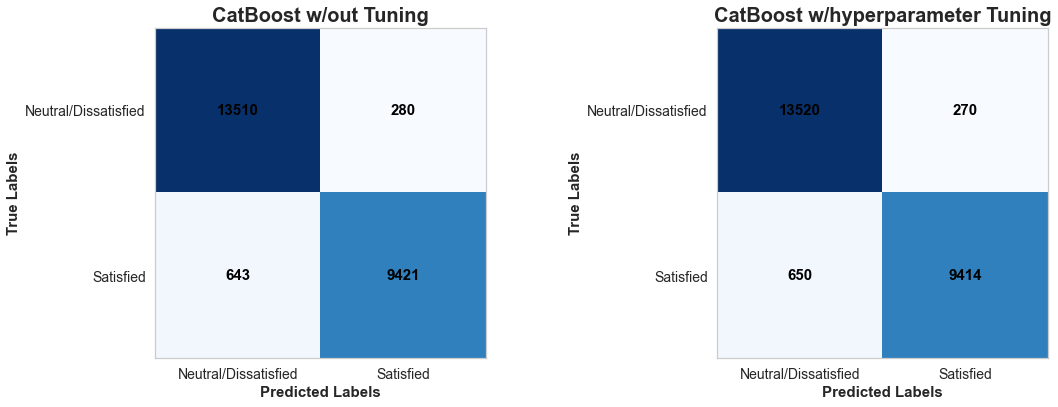

In [125]:
# create a figure with two columns and one row
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))

# plot first confusion matrix
axs[0].imshow(cm_cbv, cmap='Blues')
axs[0].grid(False)
axs[0].set_xlabel('Predicted Labels', fontweight='bold', fontsize='15')
axs[0].set_ylabel('True Labels', fontweight='bold', fontsize='15')
axs[0].set_title('CatBoost w/out Tuning', fontweight='bold', fontsize='20')
axs[0].set_xticks([0, 1])
axs[0].set_yticks([0, 1])
axs[0].xaxis.set(ticks=(0, 1), ticklabels=('Neutral/Dissatisfied', 'Satisfied'))
axs[0].yaxis.set(ticks=(0, 1), ticklabels=('Neutral/Dissatisfied', 'Satisfied'))
axs[0].xaxis.set_tick_params(labelsize=14)
axs[0].yaxis.set_tick_params(labelsize=14)

for i in range(2):
    for j in range(2):
        axs[0].text(j, i, cm_cbv[i, j], ha='center', va='center', color='black', fontsize='15', weight='bold')

# plot second confusion matrix
cm_cbrs = confusion_matrix(y_test, y_pred_cbrs)
axs[1].imshow(cm_cbrs, cmap='Blues')
axs[1].grid(False)
axs[1].set_xlabel('Predicted Labels', fontweight='bold', fontsize='15')
axs[1].set_ylabel('True Labels', fontweight='bold', fontsize='15')
axs[1].set_title('CatBoost w/hyperparameter Tuning', fontweight='bold', fontsize='20')
axs[1].set_xticks([0, 1])
axs[1].set_yticks([0, 1])
axs[1].xaxis.set(ticks=(0, 1), ticklabels=('Neutral/Dissatisfied', 'Satisfied'))
axs[1].yaxis.set(ticks=(0, 1), ticklabels=('Neutral/Dissatisfied', 'Satisfied'))
axs[1].xaxis.set_tick_params(labelsize=14)
axs[1].yaxis.set_tick_params(labelsize=14)

for i in range(2):
    for j in range(2):
        axs[1].text(j, i, cm_cbrs[i, j], ha='center', va='center', color='black', fontsize='15', weight='bold')

# adjust the spacing between the subplots
plt.subplots_adjust(wspace=0.7)

plt.show()

#### Confusion Matrix Results:
- Compared to our vanilla model, the model with hyperparameter tuning performed slightly better in terms of a higher true negative rate, and a lower false positive rate. 
- Both models performed very well. 

### CatBoost (No Tuning) Results:
- **<mark>Test Data</mark> Precision Score For Satisfied Class**: <mark>97%</mark> 
- **<mark>Test Data</mark> Precision Score For Neutral/Dissatisfied Class**: <mark>95%</mark> 
- **<mark>ROC AUC Score</mark>**: <mark>96%</mark>

### CatBoost With RandomSearchCV Results:
- **<mark>Test Data</mark> Precision Score For Satisfied Class**: <mark>97%</mark> 
- **<mark>Test Data</mark> Precision Score For Neutral/Dissatisfied Class**: <mark>95%</mark> 
- **<mark>ROC AUC Score</mark>**: <mark>96%</mark>

### Model 5: XGBoost (No Tuning)

#### Initialize XGBoost Classifier

In [126]:
# Initialize XGBoost
xgbv = xgb.XGBClassifier()

# Fit the model to the training data
xgbv.fit(X_train_scaled, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

#### Make Predictions On Training and Test Data

In [127]:
# Make predictions on the training and test data
y_pred_xgbv = xgbv.predict(X_test_scaled)
y_pred_train_xgbv = xgbv.predict(X_train_scaled)

#### Classification Report on Training Data

In [128]:
conf_mat_xgbvtrain = confusion_matrix(y_train, y_pred_train_xgbv)
class_rep_xgbvtrain = classification_report(y_train, y_pred_train_xgbv, target_names=['neutral or dissatisfied', 'satisfied'])

print('Confusion Matrix:')
print(conf_mat_xgbvtrain)

print('\nClassification Report: **XGBoost w/out Tuning On Training Data**')
print(class_rep_xgbvtrain)

Confusion Matrix:
[[40533   454]
 [ 1459 29115]]

Classification Report: **XGBoost w/out Tuning On Training Data**
                         precision    recall  f1-score   support

neutral or dissatisfied       0.97      0.99      0.98     40987
              satisfied       0.98      0.95      0.97     30574

               accuracy                           0.97     71561
              macro avg       0.97      0.97      0.97     71561
           weighted avg       0.97      0.97      0.97     71561



#### Results on Training Data:
- **Precision Score**: The precision for the "neutral or dissatisfied" class is 0.97, which means that 97% of the predictions for this class were correct.
- **Recall Score**: The recall for this class is 0.99, which means that 99% of the actual "neutral or dissatisfied" samples were correctly identified.
- **F1-Score**: The F1-score is the harmonic mean of precision and recall, and it is 0.98 for this class. 
- **Accuracy Score**: Accuracy is the proportion of correctly classified instances. On the training data, this model has an accuracy score of 0.97

#### Classification Report on Test Data

In [129]:
conf_mat_xgbvtest = confusion_matrix(y_test, y_pred_xgbv)
class_rep_xgbvtest = classification_report(y_test, y_pred_xgbv, target_names=['neutral or dissatisfied', 'satisfied'])

print('Confusion Matrix:')
print(conf_mat_xgbvtest)

print('\nClassification Report: **XGBoost w/out Tuning On Test Data**')
print(class_rep_xgbvtest)

Confusion Matrix:
[[13486   304]
 [  652  9412]]

Classification Report: **XGBoost w/out Tuning On Test Data**
                         precision    recall  f1-score   support

neutral or dissatisfied       0.95      0.98      0.97     13790
              satisfied       0.97      0.94      0.95     10064

               accuracy                           0.96     23854
              macro avg       0.96      0.96      0.96     23854
           weighted avg       0.96      0.96      0.96     23854



#### Results On Test Data:
- **Precision Score**: The precision of the model for neutral or dissatisfied customers is 95%, which means that out of all the customers predicted as neutral or dissatisfied, 95% were actually neutral or dissatisfied.
- **Recall Score**: The recall for neutral or dissatisfied customers is also 98%, which means that out of all the actual neutral or dissatisfied customers, 98% were correctly predicted as neutral or dissatisfied.
- **F1-Score**: The F1-score for neutral or dissatisfied customers is 97%.
- **Accuracy**: Overall accuracy of 96%, which means that 96% of the predictions made by the model on the test set were correct.

#### Calculate the ROC AUC Score to Check Predictive Performance

In [130]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_xgbv)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.9565848331375355

#### Confusion Matrix of XGBoost w/out Tuning On Test Data

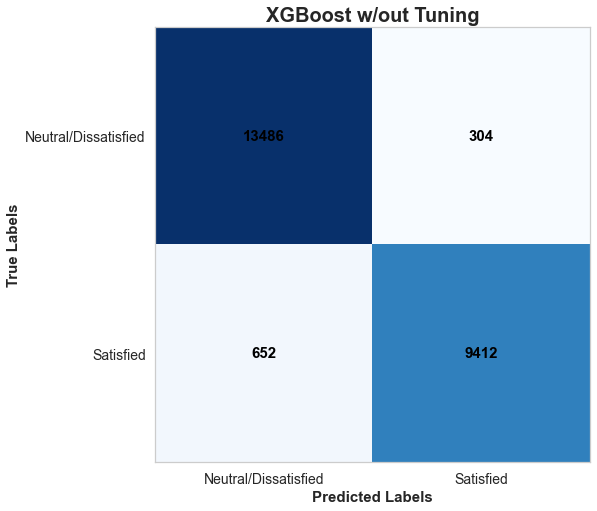

In [131]:
# get confusion matrix
cm_xgbv = confusion_matrix(y_test, y_pred_xgbv)

# plot confusion matrix
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm_xgbv, cmap='Blues')
ax.grid(False)
ax.set_xlabel('Predicted Labels', fontweight='bold', fontsize='15')
ax.set_ylabel('True Labels', fontweight='bold', fontsize='15')
ax.set_title('XGBoost w/out Tuning', fontweight='bold', fontsize='20')
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.xaxis.set(ticks=(0, 1), ticklabels=('Neutral/Dissatisfied', 'Satisfied'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Neutral/Dissatisfied', 'Satisfied'))
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)

for i in range(2):
    for j in range(2):
        ax.text(j, i, cm_xgbv[i, j], ha='center', va='center', color='black', fontsize='15', weight='bold');

### XGBoost with RandomSearchCV

#### Define Parameter Grid For RandomSearch
- I have chose these parameters for randomsearchcv to tune in an attempt to get a better accuracy score of my model. 
    - **n_estimators**: The number of trees in the model is controlled by this. 
        - Increasing the value of n_estimators increases the number of trees in the model and make it more complex. The more trees a model has, the more opportunities it has to make the correct predictions. 
    - **learning_rate**: Controls the step size at which the model updates its parameters during training.
        - A smaller learning rate means that the model will make saller updates to its parameters, which can help to prevent overfitting. 
    - **max_depth**: The maximum depth of a tree in the model. 
        - A larger value means that the tree can have more levels, which can lead to overfitting.
        - A smaller value means that the tree will be simpler and less prone to overfitting. 
    - **min_child_weight**: The minimum number of samples required to form a leaf node in the model. 
        - A larger value means that the model will have fewer leafe nodes, which help with preventing overfitting.
        - A smaller value means that the model will have more leaf nodes, which increase the risk of overfitting. 

In [132]:
# Define parameter grid 
param_grid = {
    'n_estimators': [50, 100, 200, 500, 1000],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'max_depth': [3, 4, 5, 6, 8, 10],
    'min_child_weight': [1, 3, 5, 7],
}

#### Initialize XGBoost Classifier with RandomSearchCV

In [133]:
xgbrs = xgb.XGBClassifier(random_state=42)

#Initiate randomsearchcv
random_search = RandomizedSearchCV(xgbrs, 
                                   param_distributions=param_grid,
                                   n_iter=50,
                                   scoring='roc_auc',
                                   cv=5,
                                   verbose=1,
                                   random_state=42, 
                                   n_jobs=-1)

# Fit the random search object to the training data
random_search.fit(X_train_scaled, y_train)

# Print the best hyperparameters and score
print("Best hyperparameters:", random_search.best_params_)
print("Best score:", random_search.best_score_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 10.8min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 44.7min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed: 59.6min finished


Best hyperparameters: {'n_estimators': 1000, 'min_child_weight': 3, 'max_depth': 10, 'learning_rate': 0.01}
Best score: 0.9933882442896987


#### Run XGBoost With Best Parameters

In [134]:
# Run XGBoost with the new hyperparameters
xgb_best = xgb.XGBClassifier(n_estimators=1000,
                             min_child_weight=3,
                             max_depth=10,
                             learning_rate=0.01,
                             random_state=42)

# Fit the Model with the training data
xgb_best.fit(X_train_scaled, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=10,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=0, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

#### Get Predictions

In [135]:
# Get predicitions on Test and Training Data
y_pred_xgbrs = xgb_best.predict(X_test_scaled)
y_pred_train_xgbrs = xgb_best.predict(X_train_scaled)

#### Classification Report on Training Data

In [136]:
conf_mat_xgbrstrain = confusion_matrix(y_train, y_pred_train_xgbrs)
class_rep_xgbrstrain = classification_report(y_train, y_pred_train_xgbrs, target_names=['neutral or dissatisfied', 'satisfied'])

print('Confusion Matrix:')
print(conf_mat_xgbrstrain)

print('\nClassification Report: **XGBoost w/Tuning On Training Data**')
print(class_rep_xgbrstrain)

Confusion Matrix:
[[40586   401]
 [ 1465 29109]]

Classification Report: **XGBoost w/Tuning On Training Data**
                         precision    recall  f1-score   support

neutral or dissatisfied       0.97      0.99      0.98     40987
              satisfied       0.99      0.95      0.97     30574

               accuracy                           0.97     71561
              macro avg       0.98      0.97      0.97     71561
           weighted avg       0.97      0.97      0.97     71561



In [137]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, y_pred_train_xgbrs)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.9711499398479754

#### Results on Training Data:
- **Precision Score**: The precision for the "neutral or dissatisfied" class is 0.97, which means that 97% of the predictions for this class were correct.
- **Recall Score**: The recall for this class is 0.99, which means that 99% of the actual "neutral or dissatisfied" samples were correctly identified.
- **F1-Score**: The F1-score is the harmonic mean of precision and recall, and it is 0.98 for this class. 
- **Accuracy Score**: Accuracy is the proportion of correctly classified instances. On the training data, this model has an accuracy score of 0.97

#### Classification Report on Test Data

In [138]:
conf_mat_xgbrstest = confusion_matrix(y_test, y_pred_xgbrs)
class_rep_xgbrstest = classification_report(y_test, y_pred_xgbrs, target_names=['neutral or dissatisfied', 'satisfied'])

print('Confusion Matrix:')
print(conf_mat_xgbrstest)

print('\nClassification Report: **XGBoost w/Tuning On Test Data**')
print(class_rep_xgbrstest)

Confusion Matrix:
[[13519   271]
 [  655  9409]]

Classification Report: **XGBoost w/Tuning On Test Data**
                         precision    recall  f1-score   support

neutral or dissatisfied       0.95      0.98      0.97     13790
              satisfied       0.97      0.93      0.95     10064

               accuracy                           0.96     23854
              macro avg       0.96      0.96      0.96     23854
           weighted avg       0.96      0.96      0.96     23854



#### Calculate the ROC AUC Score to Check Predictive Performance

In [139]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_xgbrs)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.9576323062494307

#### Confusion Matrixis on Test Data

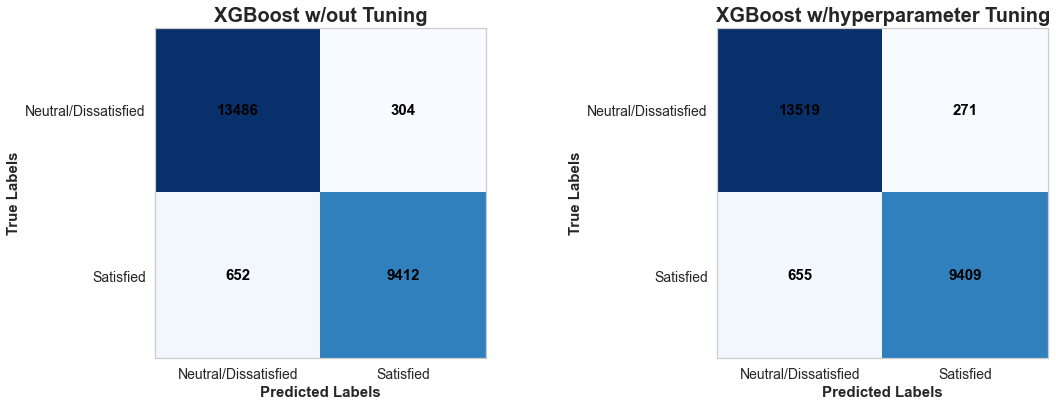

In [140]:
# create a figure with two columns and one row
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))

# plot first confusion matrix
axs[0].imshow(cm_xgbv, cmap='Blues')
axs[0].grid(False)
axs[0].set_xlabel('Predicted Labels', fontweight='bold', fontsize='15')
axs[0].set_ylabel('True Labels', fontweight='bold', fontsize='15')
axs[0].set_title('XGBoost w/out Tuning', fontweight='bold', fontsize='20')
axs[0].set_xticks([0, 1])
axs[0].set_yticks([0, 1])
axs[0].xaxis.set(ticks=(0, 1), ticklabels=('Neutral/Dissatisfied', 'Satisfied'))
axs[0].yaxis.set(ticks=(0, 1), ticklabels=('Neutral/Dissatisfied', 'Satisfied'))
axs[0].xaxis.set_tick_params(labelsize=14)
axs[0].yaxis.set_tick_params(labelsize=14)

for i in range(2):
    for j in range(2):
        axs[0].text(j, i, cm_xgbv[i, j], ha='center', va='center', color='black', fontsize='15', weight='bold')

# plot second confusion matrix
cm_xgbrs = confusion_matrix(y_test, y_pred_xgbrs)
axs[1].imshow(cm_xgbrs, cmap='Blues')
axs[1].grid(False)
axs[1].set_xlabel('Predicted Labels', fontweight='bold', fontsize='15')
axs[1].set_ylabel('True Labels', fontweight='bold', fontsize='15')
axs[1].set_title('XGBoost w/hyperparameter Tuning', fontweight='bold', fontsize='20')
axs[1].set_xticks([0, 1])
axs[1].set_yticks([0, 1])
axs[1].xaxis.set(ticks=(0, 1), ticklabels=('Neutral/Dissatisfied', 'Satisfied'))
axs[1].yaxis.set(ticks=(0, 1), ticklabels=('Neutral/Dissatisfied', 'Satisfied'))
axs[1].xaxis.set_tick_params(labelsize=14)
axs[1].yaxis.set_tick_params(labelsize=14)

for i in range(2):
    for j in range(2):
        axs[1].text(j, i, cm_xgbrs[i, j], ha='center', va='center', color='black', fontsize='15', weight='bold')

# adjust the spacing between the subplots
plt.subplots_adjust(wspace=0.7)

plt.show()

#### Confusion Matrix Results:
- Comparing the two matrixis of the test data, they are very similar. I don't believe XGBoost with hypertuning is necessary. 

### XGBoost (No Tuning) Results:
- **<mark>Test Data</mark> Precision Score For Satisfied Class**: <mark>97%</mark> 
- **<mark>Test Data</mark> Precision Score For Neutral/Dissatisfied Class**: <mark>95%</mark> 
- **<mark>ROC AUC Score</mark>**: <mark>96%</mark>

### XGBoost With RandomSearchCV Results:
- **<mark>Test Data</mark> Precision Score For Satisfied Class**: <mark>97%</mark> 
- **<mark>Test Data</mark> Precision Score For Neutral/Dissatisfied Class**: <mark>95%</mark> 
- **<mark>ROC AUC Score</mark>**: <mark>96%</mark>

## Best Model: CatBoost w/Tuning
- I have chosen catboost w/tuning as the best performing model for these reasons:
    - It is designed to work well with a dataset that has a lot of categorical data.
    - It was accurate on training and test data. 
    - It performs better in terms of predicting true negatives.
    - Has lower false negative and false positive rates. 
    - Performs about the same on predicting true positives.
    
### CatBoost With RandomSearchCV Results:
- <mark>Test Data</mark> **Precision Score** For Satisfied Class: <mark>97%</mark> 
- <mark>Test Data</mark> **Recall Score** For Satisfied Class: <mark>94%</mark> 
- <mark>Test Data</mark> **F1 Score** For Satisfied Class: <mark>95%</mark> 
- <mark>Test Data</mark> **Precision Score** For Neutral/Dissatisfied Class: <mark>95%</mark> 
- <mark>Test Data</mark> **Recall Score** For Neutral/Dissatisfied Class: <mark>98%</mark> 
- <mark>Test Data</mark> **F1 Score** For Neutral/Dissatisfied Class: <mark>96%</mark>
- **<mark>ROC AUC Score</mark>**: <mark>96%</mark>

### CatBoost Feature Importance:

In [146]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)

In [147]:
# Get importance features
cbc_feature_importance = cbc_best.feature_importances_

# Create a dataframe showing the features and their importance rating
cbc_feature_importance_df = pd.DataFrame({'Feature': X_train_scaled_df.columns, 
                                          'Importance': cbc_feature_importance}).sort_values('Importance',
                                           ascending=False)
print(cbc_feature_importance_df)

                              Feature  Importance
16     type_of_travel_Business travel   28.031129
1               inflight_wifi_service   16.650940
14  customer_type_First-time Customer    8.387085
4                     online_boarding    8.343137
9                    baggage_handling    5.319175
10                    checkin_service    4.710379
5                        seat_comfort    4.576009
6              inflight_entertainment    4.320934
11                   inflight_service    4.308990
18                     class_Business    4.282808
12                        cleanliness    2.720049
7                    on-board_service    2.203157
0                     flight_distance    2.036627
2              ease_of_online_booking    1.931743
8                            leg_room    1.574492
3                      food_and_drink    0.436798
13                      gender_Female    0.166549
15   customer_type_Returning Customer    0.000000
17     type_of_travel_Personal Travel    0.000000


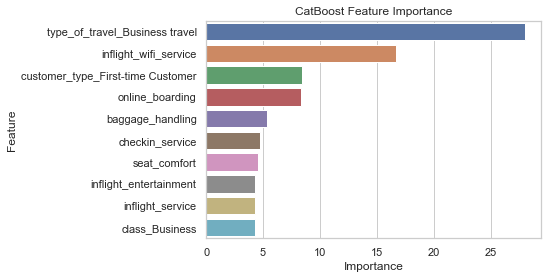

In [148]:
plt.title('CatBoost Feature Importance')
sns.barplot(data=cbc_feature_importance_df.head(10), x='Importance', y='Feature');

#### Top Five Important Features Results: 
- **type_of_travel_Business Travel**: This indicates that business travelers have different needs and expectations when traveling. Business travelers make up a huge portion of the revenue for airlines. 
    - This should be taken into account by marketing and customer service departments. 
- **inflight_wifi_service**: The quality of WIFI service provided to passengers is a strong indicator of the target variable ('satisfaction'). 
    - This suggests that passengers who experience a low quality of WIFI service during their flight experience will more likely be neutral/dissatisfied. 
- **customer_type_First-time Customer**: This feature has a moderately high importance score and suggests that first-time customers may have a different experience or expectations than returning customers, which could impact their satisfaction.
    - Marketing and customer service departments should treat first-time customers as equally as important as regular customers. 
    - In most cases, first impressions are the most important. People will always remember a bad first impression.
- **online_boarding** - This feature measures the convenience of the online check-in process.
    - Passengers who find the online check-in experience user friendly and easy, are more like to rate their travel experience as satisfied. 
- **baggage_handling**: Passengers who experience delays or other issues with baggage handling are more likely to rate their travel experience as neutral/dissatisfied. 

## Conclusion
---
- Although the majority of an aircraft is made up passengers traveling for pleasure rather than business, business travelers are the bread and butter for airlines. They should be shown extra attention by the flight staff and by Explorer Airlines staff at the airports. 
    - I recommend new marketing campaigns directed toward business travelers, possibly creating new travel incentives or partnerships with large companies that do business globally. 
- WIFI service should be addressed as well, as it shows in the important features graph. This feature not only affects the travel leisure travelers, but is absolutely necessary for those flying for business. Not only give them the option to continue to work while they are traveling, or for making their flying experience more enjoyable. 
    - I recommend, that WIFI is available on ALL airplanes no matter the flight distance. If for some reason the WIFI does not work on a flight, customer service should address the matter as soon as possible and not wait for a complaint. 
- Focusing on improving the experience for first-time customers could not only lead to higher levels of satisfaction among this customer segment but also help to build brand loyalty and encourage repeat business.
    - A recommendation could be to offer additional information to first-time customers regarding online boarding or baggage handling. 
    - Another recommendation could be to offer a personal customer service representative whose primary focus is on first-time customers. 
- The competition amongst airlines is strong. Explorer Airlines needs to keep improving their online boarding experience with a strong UX design team. 

## Future Work
- There is always an improvement when working with machine learning. With more recent data and more time for tuning and using other models, I am confident the model performance can be improved. 
- After some changes or improvements have been made to the business model, re-analyze new survey data to see if customer's satisfaction levels have changed.